### Exploratory Data Analysis

#### **Response**
- Target [Categorical] Outcome of the student  - Graduate/Dropout/Enrolled


#### **Potential Predictors**
| Predictor | Type | Description |
| :--------------- | :--------------- | :--------------- |
| Marital status | Categorical | The marital status of the student. |
| Application mode | Categorical | The method of application used by the student. |
| Application order | Numerical | The order in which the student applied. |
| Course | Categorical | The course taken by the student. |
| Daytime/evening attendance | Categorical | Whether the student attends classes during the day or in the evening. |
| Previous qualification | Categorical | The qualification obtained by the student before enrolling in the evening. |
| Nacionality | Categorical | The nationality of the student. |
| Mother's qualification | Categorical | The qualification of the student's mother.|
| Father's qualification | Categorical | The qualification of the student's father.|
| Mother's occupation | Categorical | The occupation of the student's mother.|
| Father's occupation | Categorical | The occupation of the student's father.|
| Displaced | Categorical | Whether the student is a displaced person. |
| Educational special needs | Categorical | Whether the student has any special educational needs. |
| Debtor | Categorical | Whether the student is a debtor. |
| Tuition fees up to date | Categorical | Whether the student's tuition fees are up to date. |
| Gender | Categorical | The gender of the student. |
| Scholarship holder | Categorical | Whether the student is a scholarship holder. |
| Age at enrollment | Categorical | The age of the student at the time of enrollment. |
| International | Categorical | Whether the student is an international student. |
| Curricular units 1st sem (credited) | Numerical | The number of curricular units credited by the student in the first semester. |
| Curricular units 1st sem (enrolled) | Numerical | The number of curricular units enrolled by the student in the first semester. |
| Curricular units 1st sem (evaluations) | Numerical | The number of curricular units evaluated by the student in the first semester. |
| Curricular units 1st sem (approved) | Numerical | The number of curricular units approved by the student in the first semester. |
| Curricular units 1st sem (grade) | Numerical | The number of curricular units graded by the student in the first semester. |
| Curricular units 1st sem (without evaluations) | Numerical | The number of curricular units without evaluations by the student in the first semester. |
| Curricular units 2nd sem (credited) | Numerical | The number of curricular units credited by the student in the second semester. |
| Curricular units 2nd sem (enrolled) | Numerical | The number of curricular units enrolled by the student in the second semester. |
| Curricular units 2nd sem (evaluations) | Numerical | The number of curricular units evaluated by the student in the second semester. |
| Curricular units 2nd sem (approved) | Numerical | The number of curricular units approved by the student in the second semester. |
| Curricular units 2nd sem (grade) | Numerical | The number of curricular units graded by the student in the second semester. |
| Curricular units 2nd sem (without evaluations) | Numerical | The number of curricular units without evaluations by the student in the second semester. |
| Unemployment rate | Numerical | The percentage of students who are unemployed. |
| Inflation rate | Numerical | The inflation rates experienced by students. |
| GDP | Numerical | Average economic output per student. |

In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_palette(sb.color_palette("Set2"))

# Import the Dataset
df = pd.read_csv('datasets/student-dropout-academic-success-raw.csv')

#### Target ( Categorical )
- Majority of students are **Graduates**

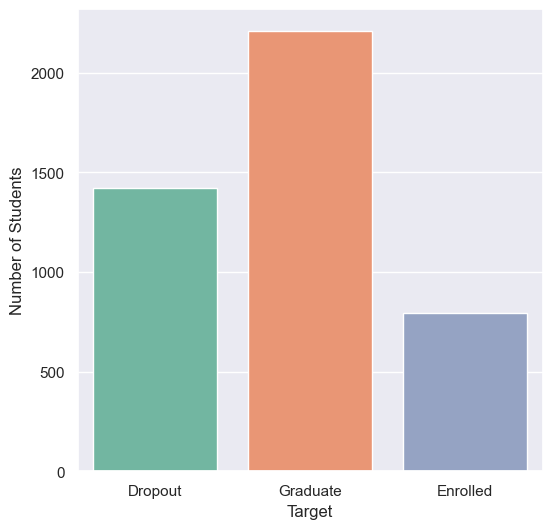

count         4424
unique           3
top       Graduate
freq          2209
Name: Target, dtype: object


In [2]:
plt.figure(figsize = (6, 6))
sb.countplot(data = df, x = 'Target')
plt.xticks(ticks = [0, 1, 2], labels=['Dropout', 'Graduate', 'Enrolled'])
plt.xlabel('Target')
plt.ylabel('Number of Students')
plt.show()
print(df["Target"].describe())

#### Marital Status (Categorical)
- Majority of Students are **Single**

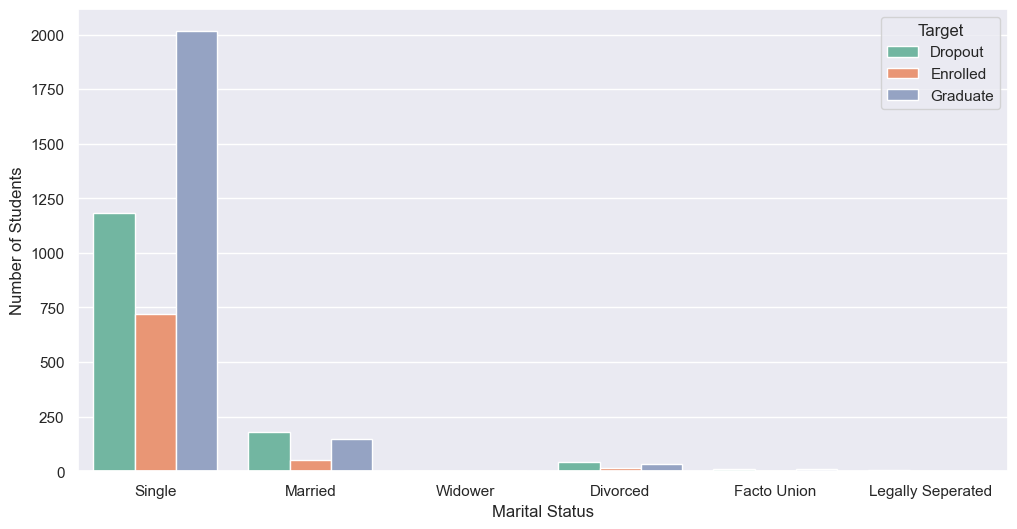

In [3]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Marital status', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

#### Application Mode (Categorical)
- Majority of Dropouts applied **over 23 Years Old**
- Majority of Enrolled applied through the **1st Phase - General Contingent**
- Majority of Graduates applied through the **1st Phase - General Contingent**

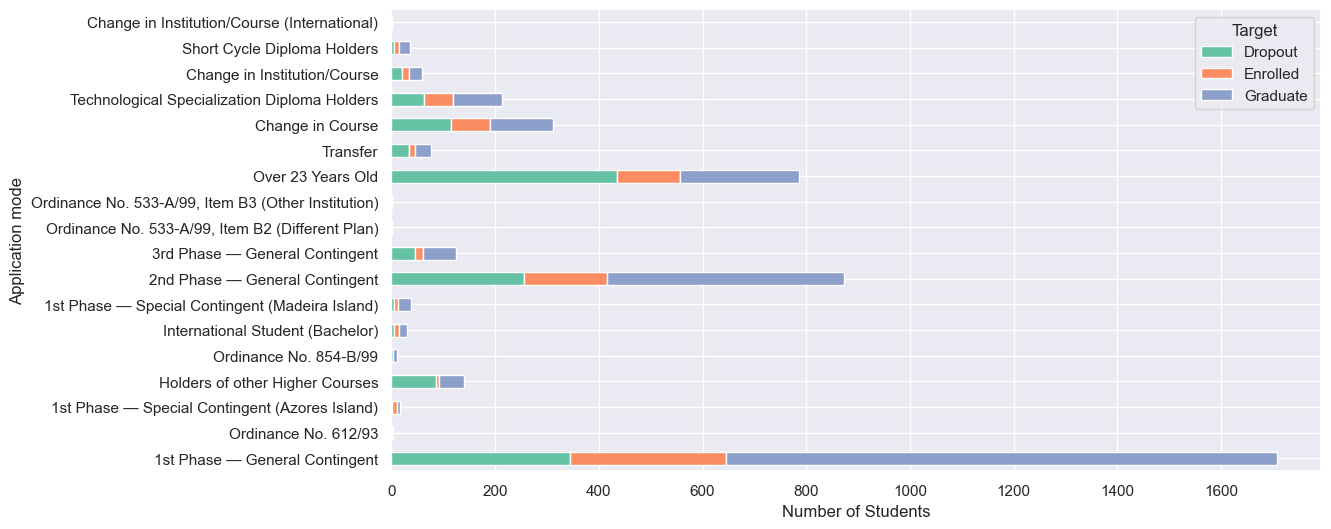

In [4]:
application_mode_df = df.groupby(['Application mode', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Application mode', values = 0)

application_mode_df.rename(index = {1: "1st Phase — General Contingent", 2: "Ordinance No. 612/93",  3: "1st Phase — Special Contingent (Azores Island)", 4: "Holders of other Higher Courses", 5: "Ordinance No. 854-B/99", 6: "International Student (Bachelor)", 7: "1st Phase — Special Contingent (Madeira Island)", 8: "2nd Phase — General Contingent", 9: "3rd Phase — General Contingent", 10: "Ordinance No. 533-A/99, Item B2 (Different Plan)", 11: "Ordinance No. 533-A/99, Item B3 (Other Institution)", 12: "Over 23 Years Old", 13: "Transfer", 14: "Change in Course", 15: "Technological Specialization Diploma Holders", 16: "Change in Institution/Course", 17: "Short Cycle Diploma Holders", 18: "Change in Institution/Course (International)"}, inplace = True)
application_mode_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

#### Application Order (Numerical)
- Majority of Students applied with **order 1**

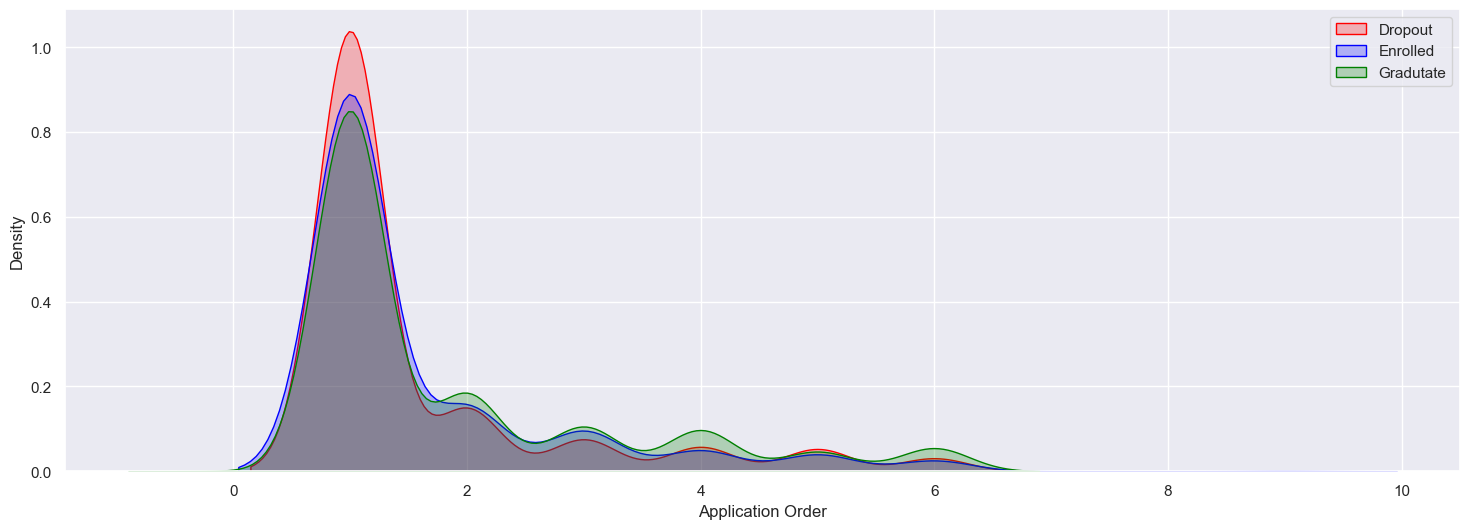

In [5]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Application order"], shade=True, color="red", label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Application order"], shade=True, color="blue", label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Application order"], shade=True, color="green", label="Gradutate", ax=ax)

ax.set_xlabel("Application Order")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Application order'>

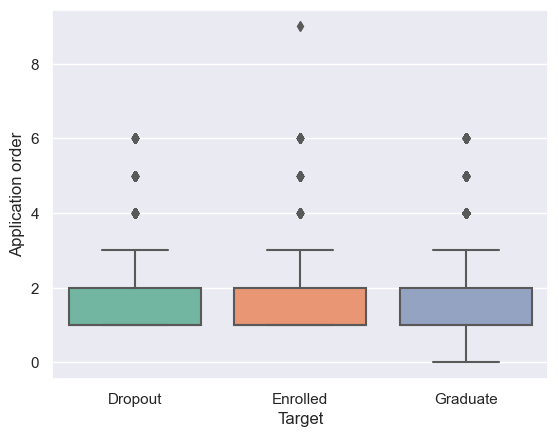

In [6]:
median = df[["Application order", "Target"]].groupby("Target").median().sort_values(by = "Application order")
sb.boxplot(x = "Target", y = "Application order", data = df, order = median.index)

#### Course (Categorical)
- **Nursing** Course produced the highest number of Graduates
- **Management (Evening Attendance)** Course produced the highest number of Dropouts
- Majority of enrolled students are in the **Management** Course

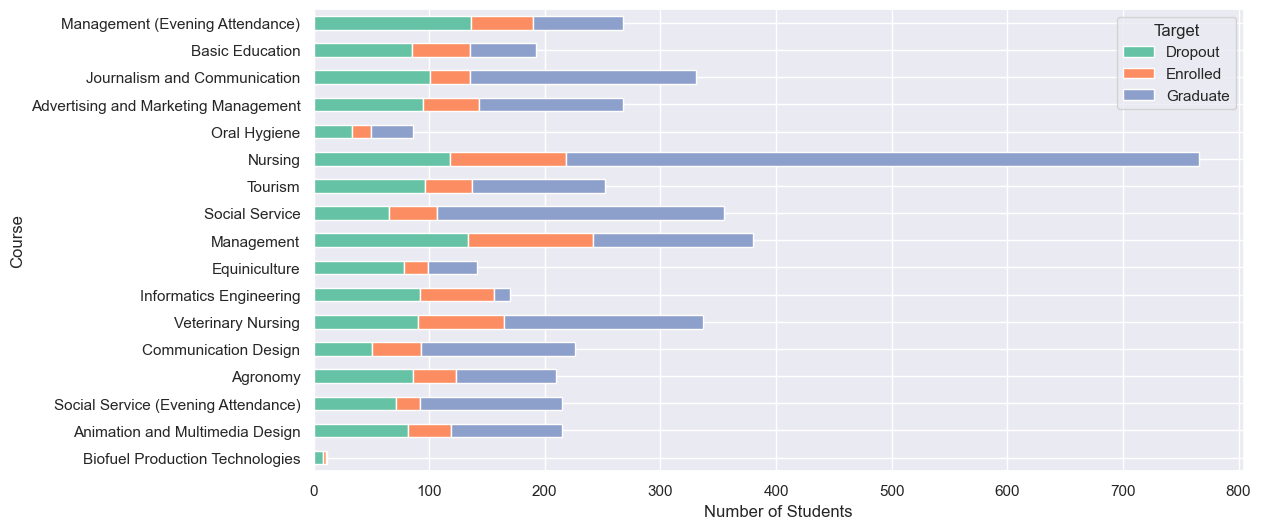

In [7]:
course_df = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Course', values = 0)

course_df.rename(index = {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (Evening Attendance)', 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing', 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication', 16: 'Basic Education', 17: 'Management (Evening Attendance)'}, inplace = True)
course_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

#### Daytime/Evening Attendance (Categorical)
- Majority of Students attend school during **Daytime**

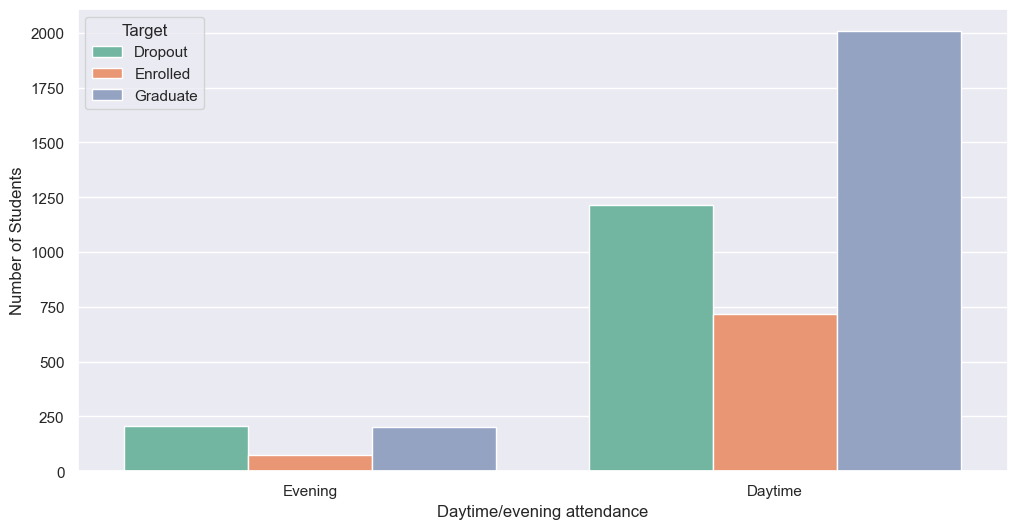

In [8]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Daytime/evening attendance', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['Evening', 'Daytime'])
plt.ylabel('Number of Students')
plt.show()

#### Previous Qualification (Categorical)
- Majority of Students finished **Secondary Education**

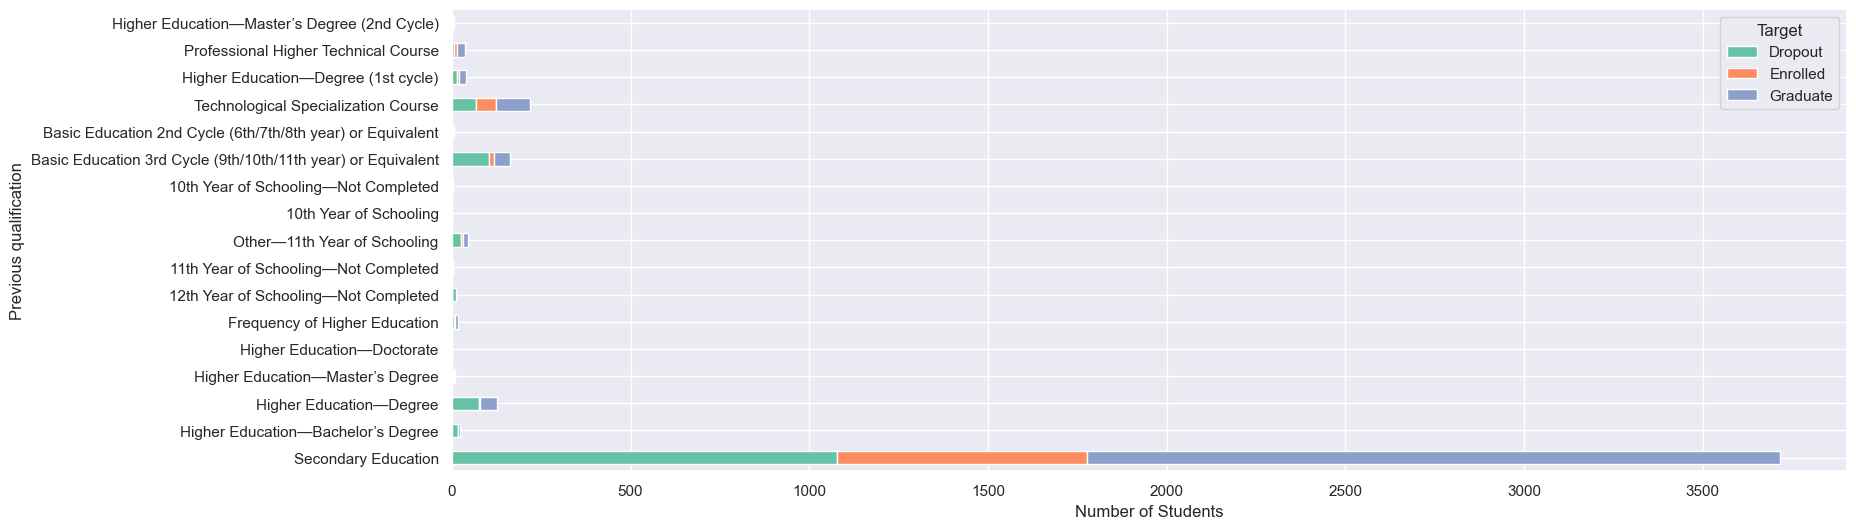

In [9]:
prevqual_df = df.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Previous qualification', values = 0)

prevqual_df.rename(index = {1: 'Secondary Education', 2: 'Higher Education—Bachelor’s Degree', 3: 'Higher Education—Degree', 4: 'Higher Education—Master’s Degree', 5: 'Higher Education—Doctorate', 6: 'Frequency of Higher Education', 7: '12th Year of Schooling—Not Completed', 8: '11th Year of Schooling—Not Completed', 9: 'Other—11th Year of Schooling', 10: '10th Year of Schooling', 11: '10th Year of Schooling—Not Completed', 12: 'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent', 13: 'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent', 14: 'Technological Specialization Course', 15: 'Higher Education—Degree (1st cycle)', 16: 'Professional Higher Technical Course', 17: 'Higher Education—Master’s Degree (2nd Cycle)'}, inplace = True)
prevqual_df.plot(kind = 'barh', stacked = True, figsize = (18, 6))

plt.xlabel('Number of Students')
plt.show()

#### Nationality (Categorical)
- Majority of Students are **Portuguese**

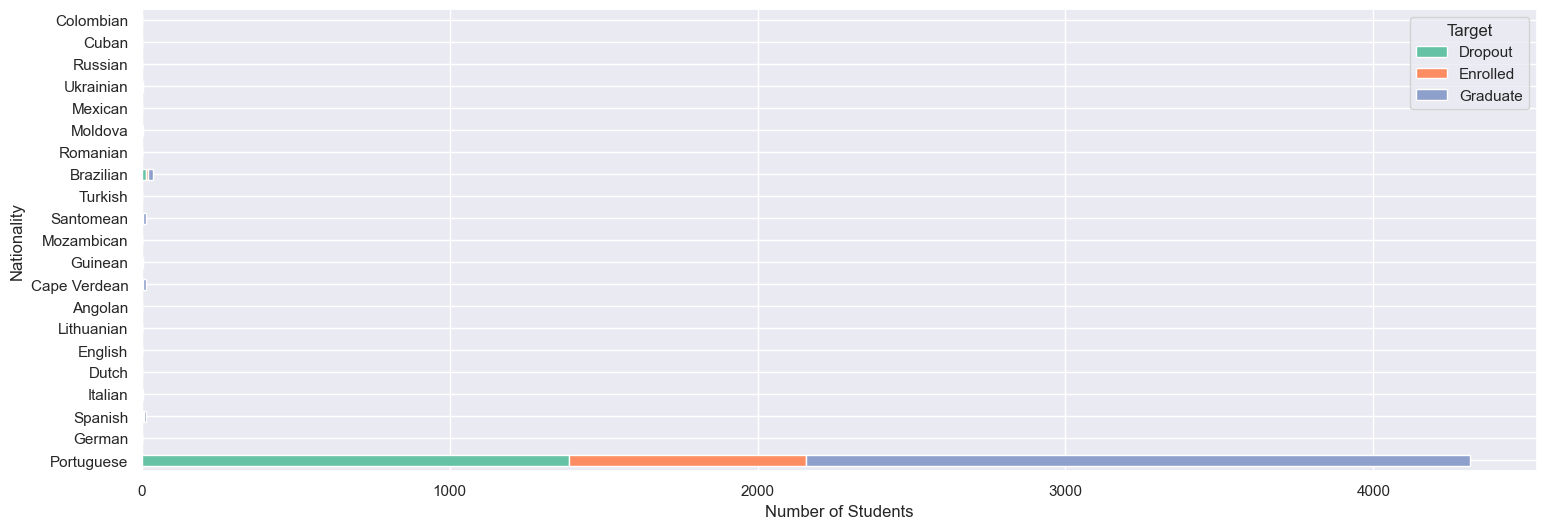

In [10]:
nationality_df = df.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Nacionality', values = 0)

nationality_df.rename(index = {1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English', 7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican', 12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova', 17: 'Mexican', 18: 'Ukrainian', 19: 'Russian', 20: 'Cuban', 21: 'Colombian'}, inplace = True)
nationality_df.plot(kind = 'barh', stacked = True, figsize = (18, 6))

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

#### Mother's Qualification (Categorical)
- Majority of Dropout Students Mother's completed **General Course of Administration and Commerce**
- Majority of Enrolled Students Mother's completed **Secondary Education — 12th Year of Schooling or Equivalent**
- Majority of Graduate Students Mother's completed **Secondary Education — 12th Year of Schooling or Equivalent**

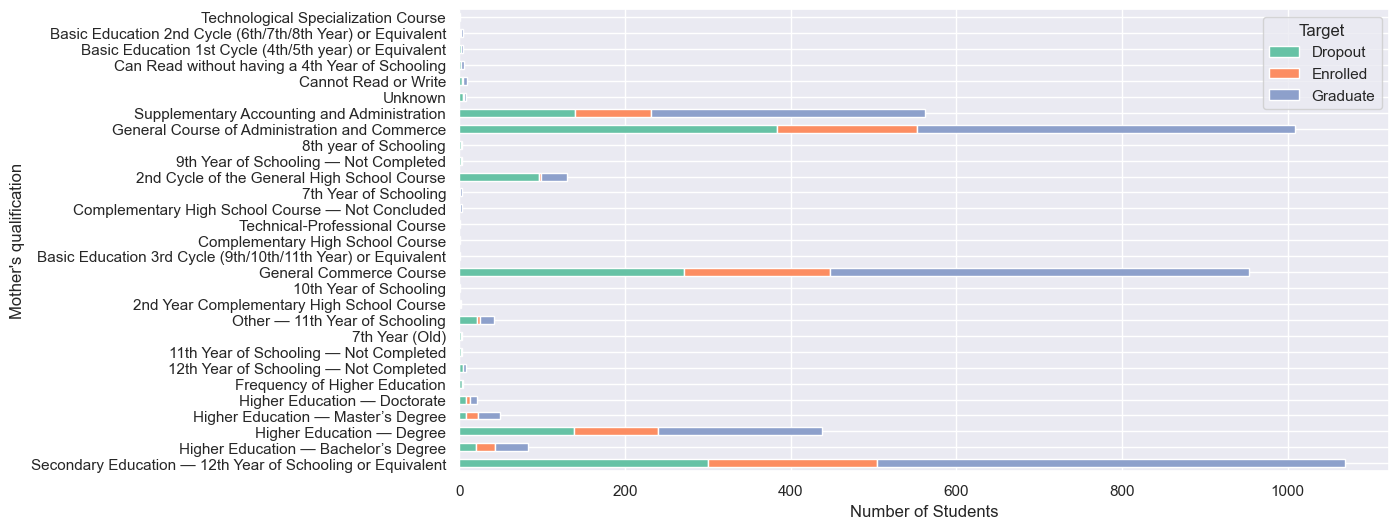

In [11]:
mother_qual_df = df.groupby(["Mother's qualification", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Mother's qualification", values = 0)

mother_qual_df.rename(index = {1: "Secondary Education — 12th Year of Schooling or Equivalent", 2: "Higher Education — Bachelor’s Degree", 3: "Higher Education — Degree", 4: "Higher Education — Master’s Degree", 5: "Higher Education — Doctorate", 6: "Frequency of Higher Education", 7: "12th Year of Schooling — Not Completed", 8: "11th Year of Schooling — Not Completed", 9: "7th Year (Old)", 10: "Other — 11th Year of Schooling", 11: "2nd Year Complementary High School Course", 12: "10th Year of Schooling", 13: "General Commerce Course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 15: "Complementary High School Course", 16: "Technical-Professional Course", 17: "Complementary High School Course — Not Concluded", 18: "7th Year of Schooling", 19: "2nd Cycle of the General High School Course", 20: "9th Year of Schooling — Not Completed", 21: "8th year of Schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 24: "Unknown", 25: "Cannot Read or Write", 26: "Can Read without having a 4th Year of Schooling", 27: "Basic Education 1st Cycle (4th/5th year) or Equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent", 29: "Technological Specialization Course", 30: "Higher Education — Degree (1st Cycle)", 31: "Specialized Higher Studies Course", 32: "Professional Higher Technical Course", 33: "Higher Education — Master’s Degree (2nd Cycle)", 34: "Higher Education — Doctorate (3rd Cycle)"}, inplace = True)
mother_qual_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

#### Father's Qualification (Categorical)
- Majority of Student's Father completed **Basic Education 1st Cycle (4th/5th Year) or Equivalent**

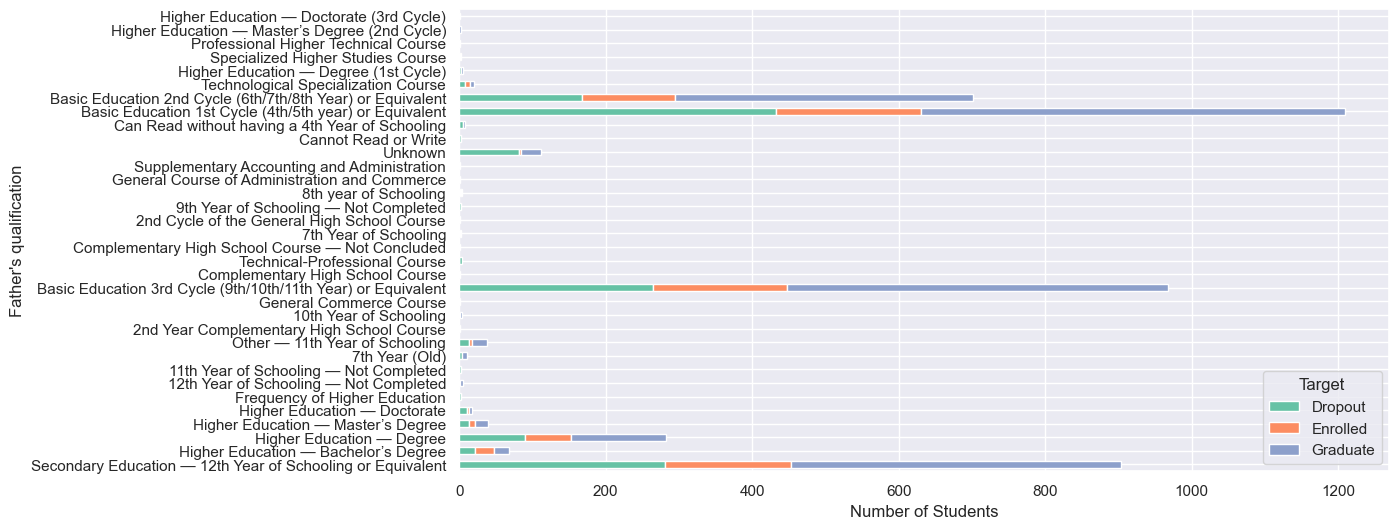

In [12]:
father_qual_df = df.groupby(["Father's qualification", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Father's qualification", values = 0)

father_qual_df.rename(index = {1: "Secondary Education — 12th Year of Schooling or Equivalent", 2: "Higher Education — Bachelor’s Degree", 3: "Higher Education — Degree", 4: "Higher Education — Master’s Degree", 5: "Higher Education — Doctorate", 6: "Frequency of Higher Education", 7: "12th Year of Schooling — Not Completed", 8: "11th Year of Schooling — Not Completed", 9: "7th Year (Old)", 10: "Other — 11th Year of Schooling", 11: "2nd Year Complementary High School Course", 12: "10th Year of Schooling", 13: "General Commerce Course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 15: "Complementary High School Course", 16: "Technical-Professional Course", 17: "Complementary High School Course — Not Concluded", 18: "7th Year of Schooling", 19: "2nd Cycle of the General High School Course", 20: "9th Year of Schooling — Not Completed", 21: "8th year of Schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 24: "Unknown", 25: "Cannot Read or Write", 26: "Can Read without having a 4th Year of Schooling", 27: "Basic Education 1st Cycle (4th/5th year) or Equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent", 29: "Technological Specialization Course", 30: "Higher Education — Degree (1st Cycle)", 31: "Specialized Higher Studies Course", 32: "Professional Higher Technical Course", 33: "Higher Education — Master’s Degree (2nd Cycle)", 34: "Higher Education — Doctorate (3rd Cycle)"}, inplace = True)
father_qual_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

#### Mother's Occupation (Categorical)
- Majority of Students Mother's holds an occupation as an **Unskilled Workers**

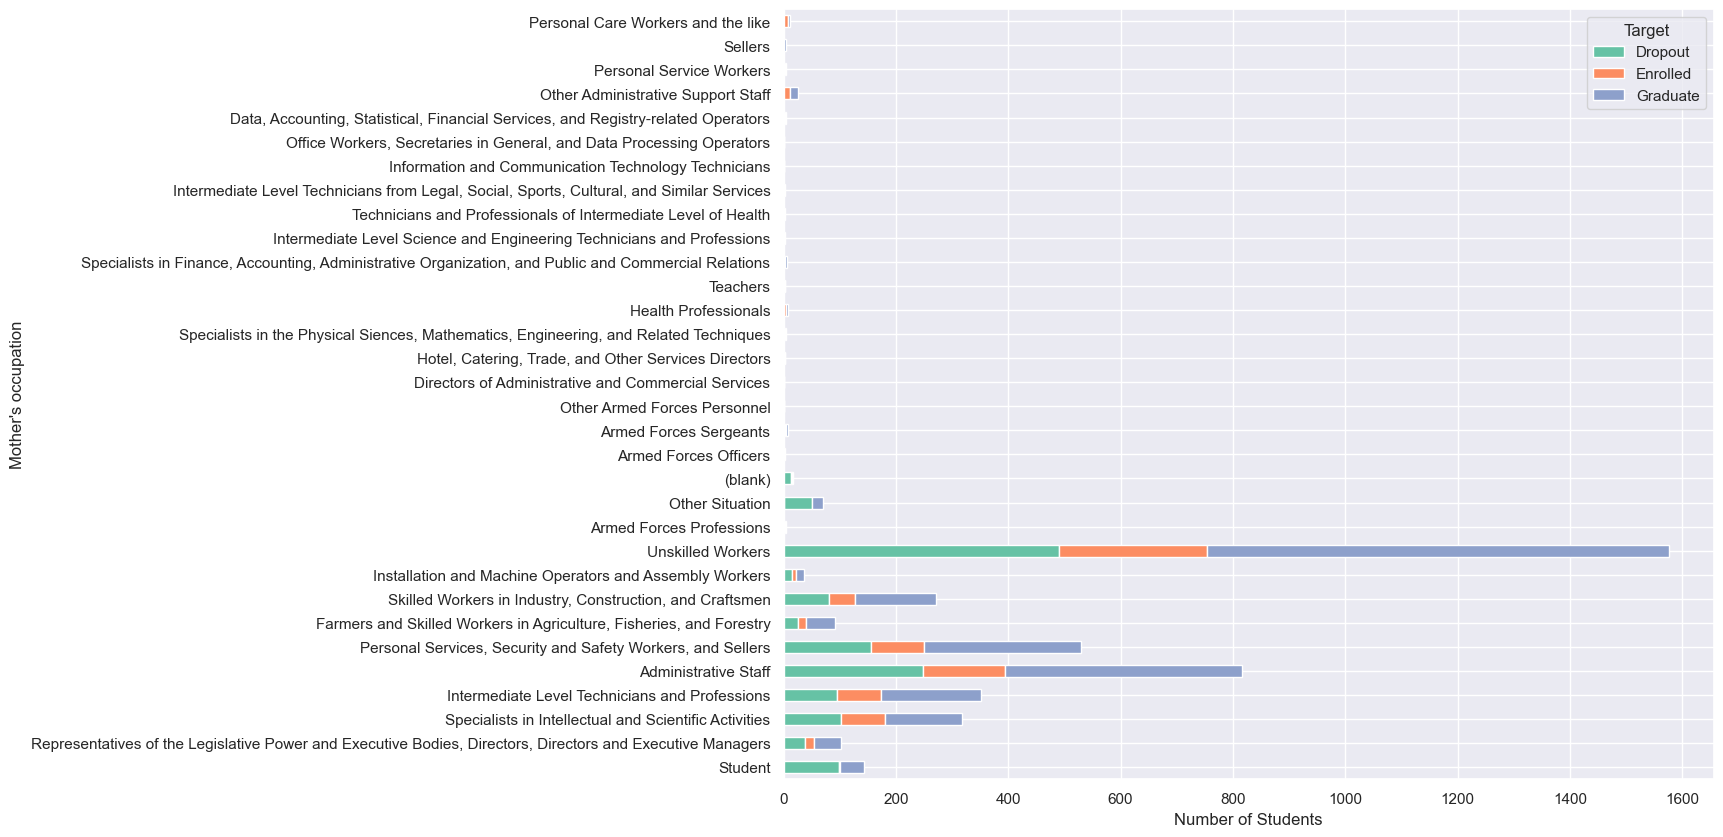

In [13]:
mother_occupation_df = df.groupby(["Mother's occupation", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Mother's occupation", values = 0)

mother_occupation_df.rename(index = {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative Staff", 6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry", 8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers", 10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 15: "Armed Forces Sergeants", 16: "Other Armed Forces Personnel", 17: "Directors of Administrative and Commercial Services", 18: "Hotel, Catering, Trade, and Other Services Directors", 19: "Specialists in the Physical Siences, Mathematics, Engineering, and Related Techniques", 20: "Health Professionals", 21: "Teachers", 22: "Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial Relations", 23: "Intermediate Level Science and Engineering Technicians and Professions", 24: "Technicians and Professionals of Intermediate Level of Health", 25: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services", 26: "Information and Communication Technology Technicians", 27: "Office Workers, Secretaries in General, and Data Processing Operators", 28: "Data, Accounting, Statistical, Financial Services, and Registry-related Operators", 29: "Other Administrative Support Staff", 30: "Personal Service Workers", 31: "Sellers", 32: "Personal Care Workers and the like", 33: "Protection and Security Services Personnel", 34: "Market-oriented Farmers and Skilled Agricultural and Animal Production Workers", 35: "Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence", 36: "Skilled Construction Workers and the like, except Electricians", 37: "Skilled Workers in Metallurgy, Metalworking, and Similar", 38: "Skilled Workers in Electricity and Electronics", 39: "Workers in Food Processing, Woodworking, and Clothing and other Industries and Crafts", 40: "Fixed Plant and Machine Operators", 41: "Assembly Workers", 42: "Vehicle Drivers and Mobile Equipment Operators", 43: "Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry", 44: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport", 45: "Meal Preparation Assistants", 46: "Street Vendors (except Food) and Street Service Providers"}, inplace = True)
mother_occupation_df.plot(kind = 'barh', stacked = True, figsize = (12, 10))

plt.xlabel('Number of Students')
plt.show()

#### Father's Occupation (Categorical)

- Majority of Dropout Students Father's holds an occupation as an **Unskilled Worker**

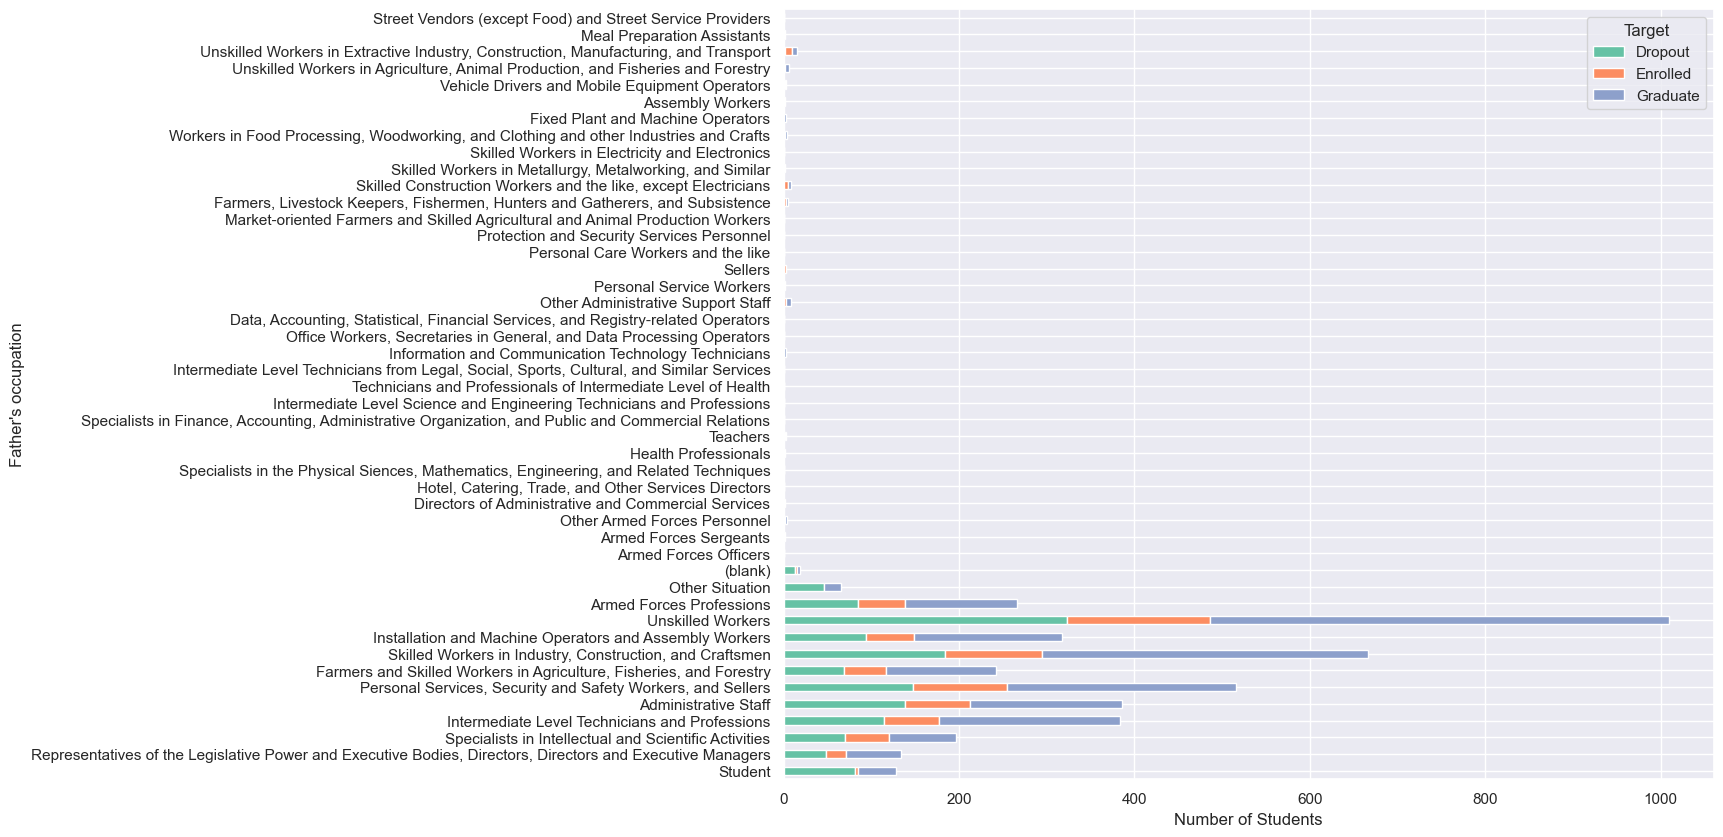

In [14]:
father_occupation_df = df.groupby(["Father's occupation", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Father's occupation", values = 0)

father_occupation_df.rename(index = {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative Staff", 6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry", 8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers", 10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 15: "Armed Forces Sergeants", 16: "Other Armed Forces Personnel", 17: "Directors of Administrative and Commercial Services", 18: "Hotel, Catering, Trade, and Other Services Directors", 19: "Specialists in the Physical Siences, Mathematics, Engineering, and Related Techniques", 20: "Health Professionals", 21: "Teachers", 22: "Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial Relations", 23: "Intermediate Level Science and Engineering Technicians and Professions", 24: "Technicians and Professionals of Intermediate Level of Health", 25: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services", 26: "Information and Communication Technology Technicians", 27: "Office Workers, Secretaries in General, and Data Processing Operators", 28: "Data, Accounting, Statistical, Financial Services, and Registry-related Operators", 29: "Other Administrative Support Staff", 30: "Personal Service Workers", 31: "Sellers", 32: "Personal Care Workers and the like", 33: "Protection and Security Services Personnel", 34: "Market-oriented Farmers and Skilled Agricultural and Animal Production Workers", 35: "Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence", 36: "Skilled Construction Workers and the like, except Electricians", 37: "Skilled Workers in Metallurgy, Metalworking, and Similar", 38: "Skilled Workers in Electricity and Electronics", 39: "Workers in Food Processing, Woodworking, and Clothing and other Industries and Crafts", 40: "Fixed Plant and Machine Operators", 41: "Assembly Workers", 42: "Vehicle Drivers and Mobile Equipment Operators", 43: "Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry", 44: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport", 45: "Meal Preparation Assistants", 46: "Street Vendors (except Food) and Street Service Providers"}, inplace = True)
father_occupation_df.plot(kind = 'barh', stacked = True, figsize = (12, 10))

plt.xlabel('Number of Students')
plt.show()

#### Displaced (Categorical)
- Majority of Dropout Students are **Not Displaced**
- Majority of Enrolled Students are **Displaced**
- Majority of Graduate Students are **Displaced**

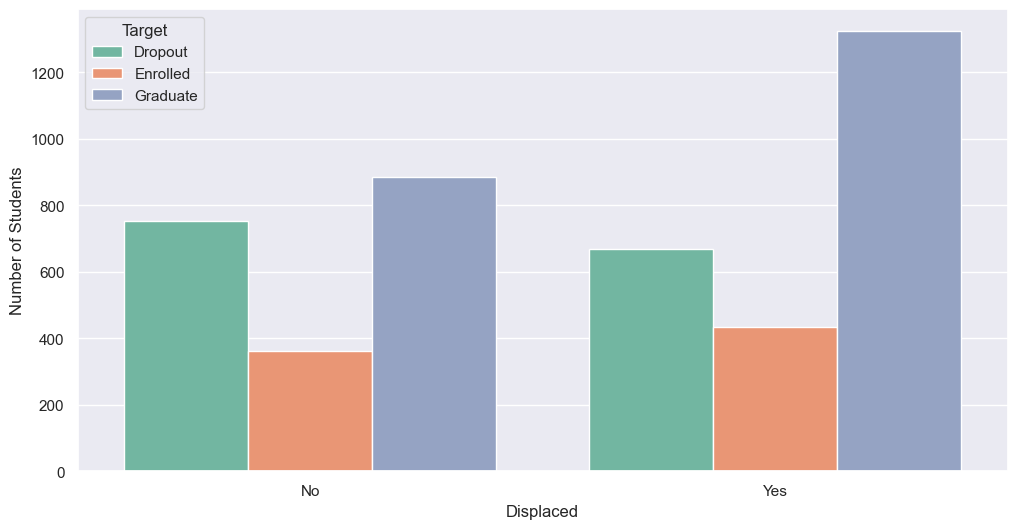

In [15]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Displaced', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()

#### Educational special needs (Categorical)

- Most students have **no educational special needs**
- The correlation between students with Educational special needs and dropped out is close to 0, suggesting there is little
relationship between the 2.

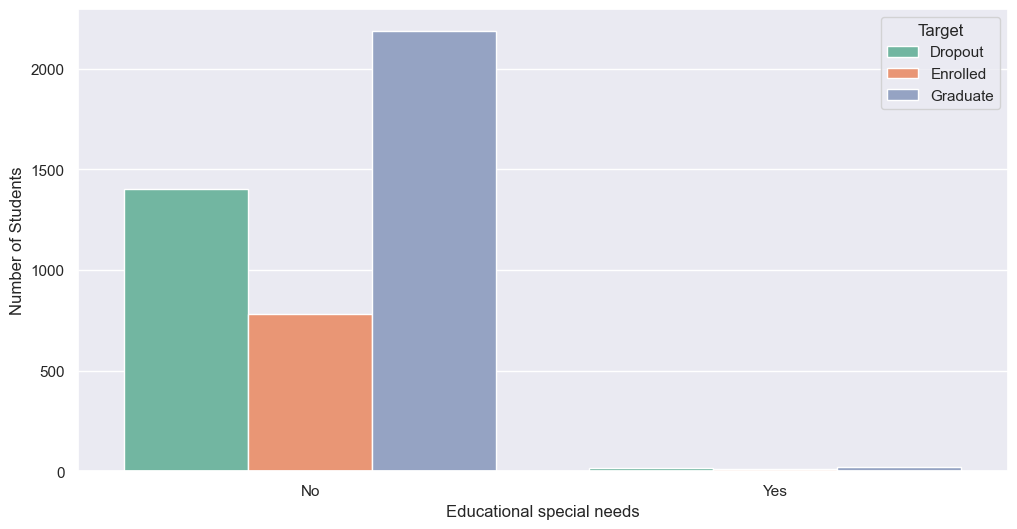

  Educational special needs    Target  Count
0                        No   Dropout   1404
1                        No  Enrolled    783
2                        No  Graduate   2186
3                       Yes   Dropout     17
4                       Yes  Enrolled     11
5                       Yes  Graduate     23
                                Educational special needs corr  \
Educational special needs corr                        1.000000   
Dropped Out corr                                      0.002806   

                                Dropped Out corr  
Educational special needs corr          0.002806  
Dropped Out corr                        1.000000  


In [16]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Educational special needs', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()

df['Educational special needs'] = df['Educational special needs'].replace({0: 'No', 1: 'Yes'})
ESN_counts = df.groupby(['Educational special needs', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['Educational special needs corr'] = df['Educational special needs'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Educational special needs corr', 'Dropped Out corr']].corr()
print(corr)

#### Debtor (Categorical)

- Most students are **not debtors**
- The correlation between students who are debtors and dropped out is 0.229407, suggesting there is a weak positive correlation between the two variables

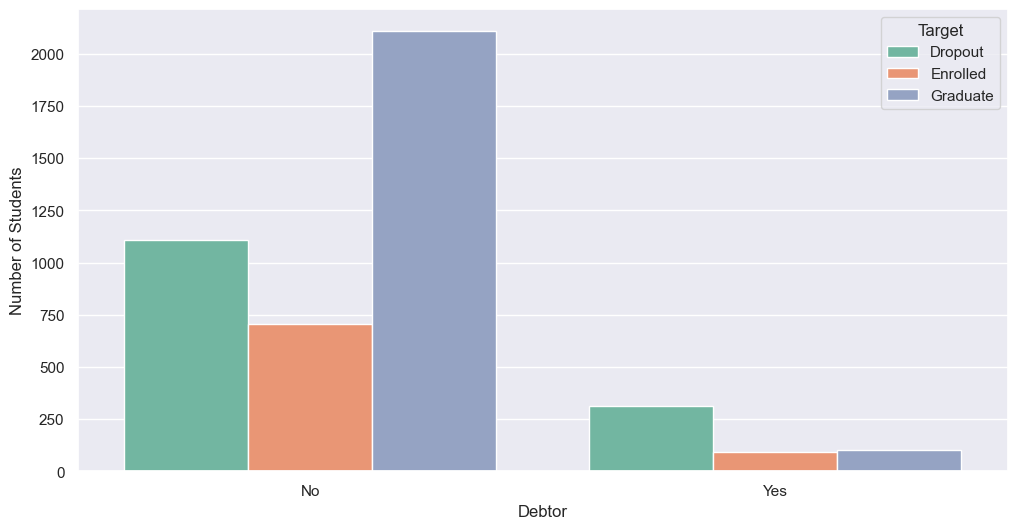

  Debtor    Target  Count
0     No   Dropout   1109
1     No  Enrolled    704
2     No  Graduate   2108
3    Yes   Dropout    312
4    Yes  Enrolled     90
5    Yes  Graduate    101
                  Debtor corr  Dropped Out corr
Debtor corr          1.000000          0.229407
Dropped Out corr     0.229407          1.000000


In [17]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Debtor', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()

df['Debtor'] = df['Debtor'].replace({0: 'No', 1: 'Yes'})
ESN_counts = df.groupby(['Debtor', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['Debtor corr'] = df['Debtor'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Debtor corr', 'Dropped Out corr']].corr()
print(corr)

#### Tuition fees up to date (Categorical)

- Most students are not debtors
- The correlation between students with Tuition fees up to date and dropped out is -0.429149, suggesting there is a moderate  negative correlation between the two variables, and there is a possiblity that those whose tuition fees are not up to date and end up dropping out of school

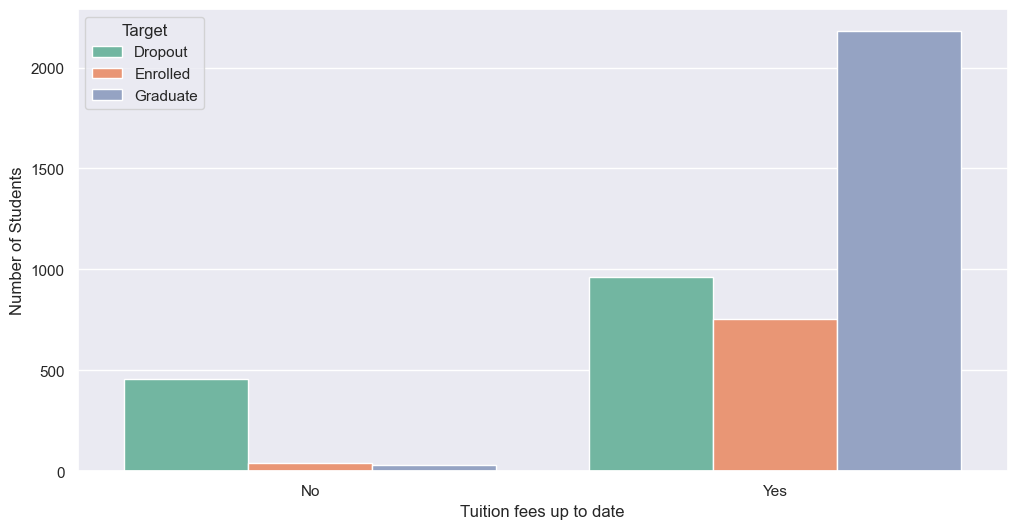

  Tuition fees up to date    Target  Count
0                      No   Dropout    457
1                      No  Enrolled     42
2                      No  Graduate     29
3                     Yes   Dropout    964
4                     Yes  Enrolled    752
5                     Yes  Graduate   2180
                              Tuition fees up to date corr  Dropped Out corr
Tuition fees up to date corr                      1.000000         -0.429149
Dropped Out corr                                 -0.429149          1.000000


In [18]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Tuition fees up to date', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()

df['Tuition fees up to date'] = df['Tuition fees up to date'].replace({0: 'No', 1: 'Yes'})
ESN_counts = df.groupby(['Tuition fees up to date', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['Tuition fees up to date corr'] = df['Tuition fees up to date'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Tuition fees up to date corr', 'Dropped Out corr']].corr()
print(corr)

#### Gender (Categorical)

- There are 46% more females than males in the school
- The correlation between Male students and dropout is 0.203983, suggesting there is a weak positive correlation between whether they are males and whether they will drop out

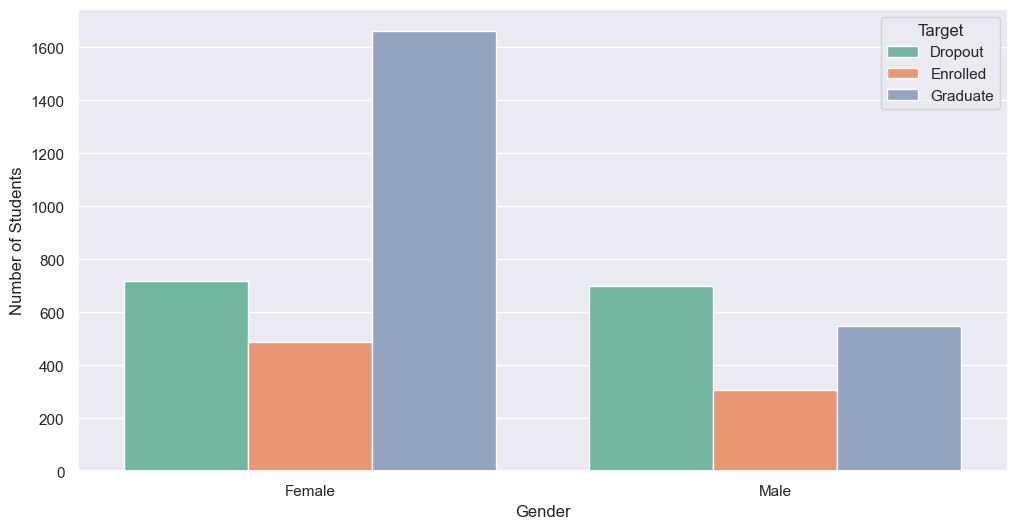

   Gender    Target  Count
0  Female   Dropout    720
1  Female  Enrolled    487
2  Female  Graduate   1661
3    Male   Dropout    701
4    Male  Enrolled    307
5    Male  Graduate    548
                  Female corr  Dropped Out corr
Female corr          1.000000         -0.203983
Dropped Out corr    -0.203983          1.000000
                  Male corr  Dropped Out corr
Male corr          1.000000          0.203983
Dropped Out corr   0.203983          1.000000


In [19]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Gender', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
ESN_counts = df.groupby(['Gender', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['Female corr'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Female corr', 'Dropped Out corr']].corr()
print(corr)

df['Male corr'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Male corr', 'Dropped Out corr']].corr()
print(corr)

#### Scholarship holder (Categorical)

- There are 46% more females than males in the school.
- The correlation between whether a student is a Scholarship holder and dropout is -0.245354, suggesting there is a weak negative correlation between when a student is a scholar and whether the student will drop out

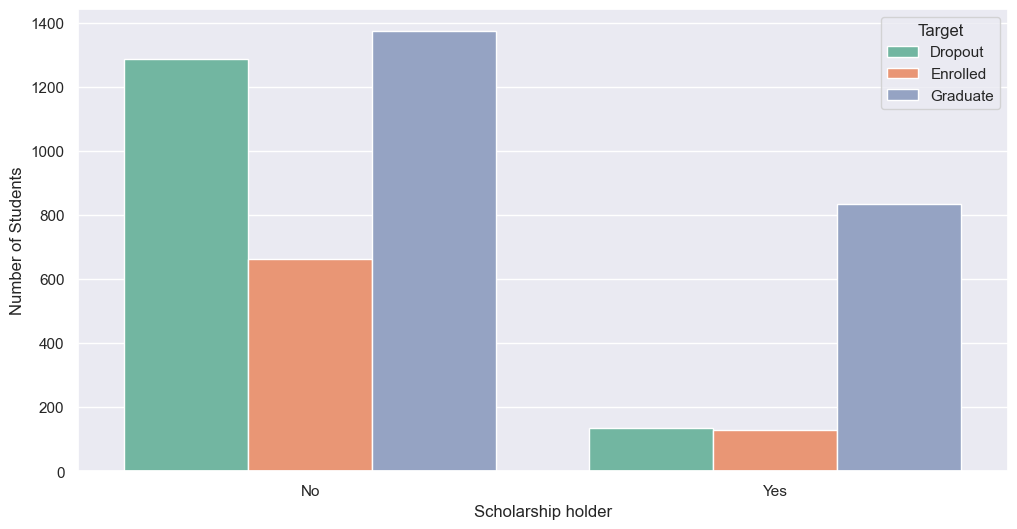

   Gender    Target  Count
0  Female   Dropout    720
1  Female  Enrolled    487
2  Female  Graduate   1661
3    Male   Dropout    701
4    Male  Enrolled    307
5    Male  Graduate    548
                         Scholarship holder corr  Dropped Out corr
Scholarship holder corr                 1.000000         -0.245354
Dropped Out corr                       -0.245354          1.000000


In [20]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Scholarship holder', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()

df['Scholarship holder'] = df['Scholarship holder'].replace({0: 'No', 1: 'Yes'})
ESN_counts = df.groupby(['Gender', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['Scholarship holder corr'] = df['Scholarship holder'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['Scholarship holder corr', 'Dropped Out corr']].corr()
print(corr)

#### Age at enrollment (Categorical)

- Most of the students enrolled into university when they are below 30 years old
- As a student becomes older, the chances of him dropping out is higher

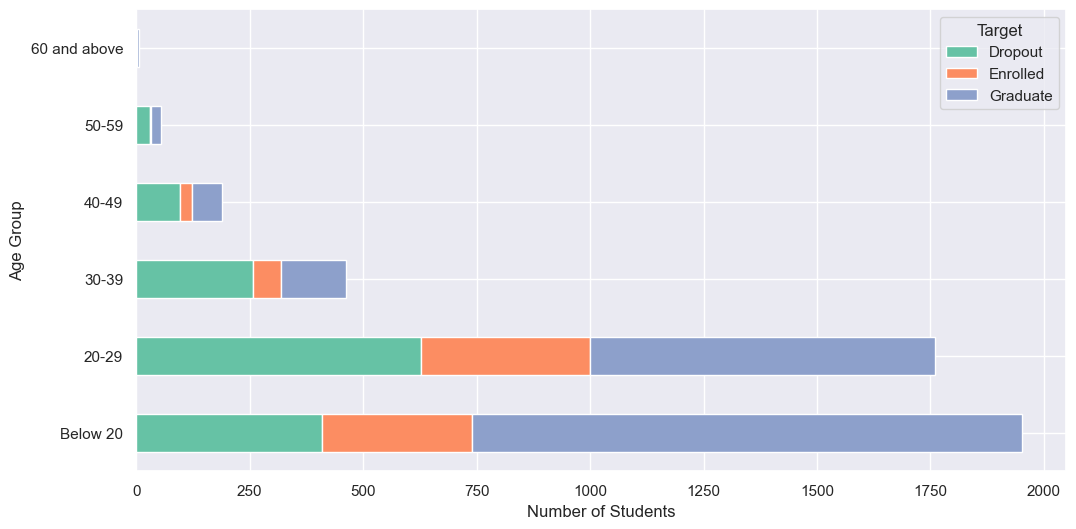

Percentage of students who drop out for each age group: 
Below 20: 20.95%
20-29: 35.60%
30-39: 55.72%
40-49: 50.79%
50-59: 53.70%
60 and above: 40.00%


In [21]:
bins = [0, 19, 29, 39, 49, 59,100]
labels = ['Below 20', '20-29', '30-39', '40-49', '50-59', '60 and above']
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels, include_lowest=True)


Age_at_enrollment_df = df.groupby(["Age Group", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Age Group", values = 0)

Age_at_enrollment_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

print("Percentage of students who drop out for each age group: ")
for i in range(6):
    Age_df = Age_at_enrollment_df.iloc[i]
    dropout_percent = (Age_df["Dropout"].sum() / (Age_df["Dropout"].sum() + Age_df["Enrolled"].sum() + Age_df["Graduate"].sum())) * 100
    print(f"{labels[i]}: {dropout_percent:.2f}%")

#### International (Categorical)

- Most of the students are local
- The correlation between Male students and dropout is -0.01036, suggesting there is a no correlation between whether they are International and whether they will drop out

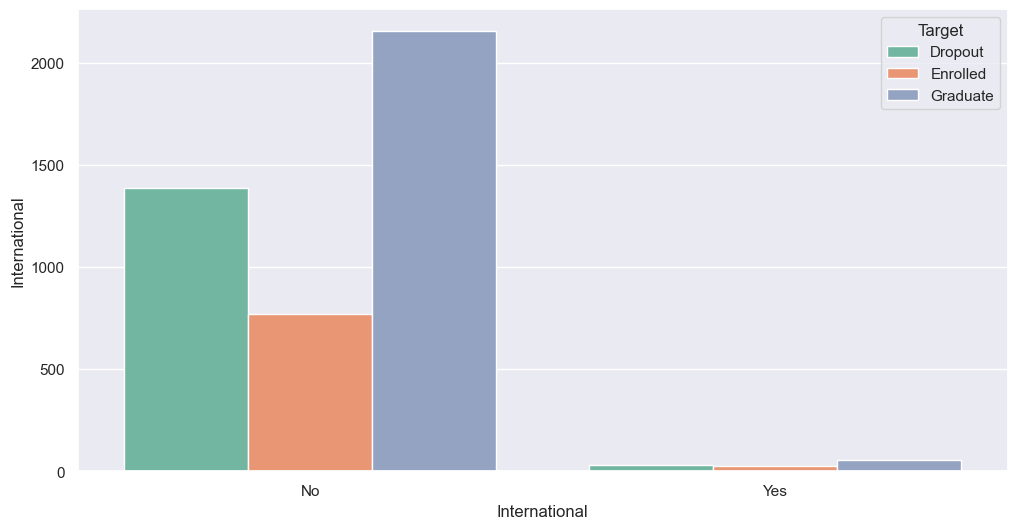

  International    Target  Count
0            No   Dropout   1389
1            No  Enrolled    770
2            No  Graduate   2155
3           Yes   Dropout     32
4           Yes  Enrolled     24
5           Yes  Graduate     54
                    International corr  Dropped Out corr
International corr             1.00000          -0.01036
Dropped Out corr              -0.01036           1.00000


In [22]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'International', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('International')
plt.show()

df['International'] = df['International'].replace({0: 'No', 1: 'Yes'})
ESN_counts = df.groupby(['International', 'Target']).size().reset_index(name='Count')
print(ESN_counts)

df['International corr'] = df['International'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dropped Out corr'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

corr = df[['International corr', 'Dropped Out corr']].corr()
print(corr)

#### Cirricular units 1st sem (credited) (Numerical)
- Majority of Students had **0 curricular units** credited in the 1st semester

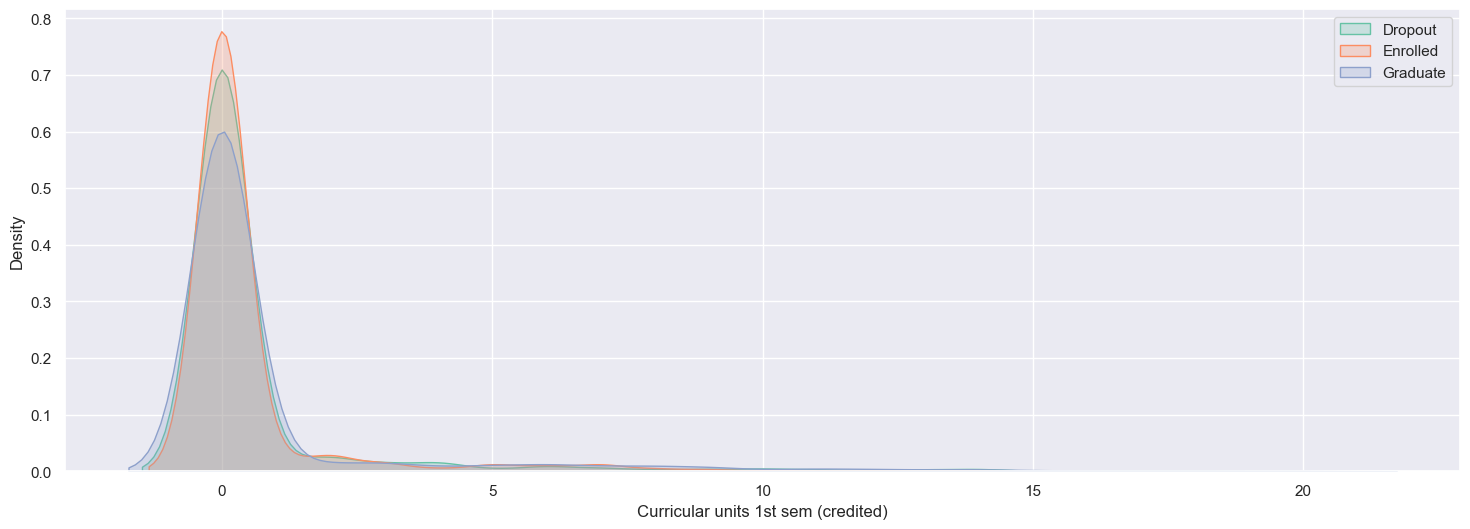

In [23]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (credited)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (credited)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (credited)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 1st sem (credited)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (credited)'>

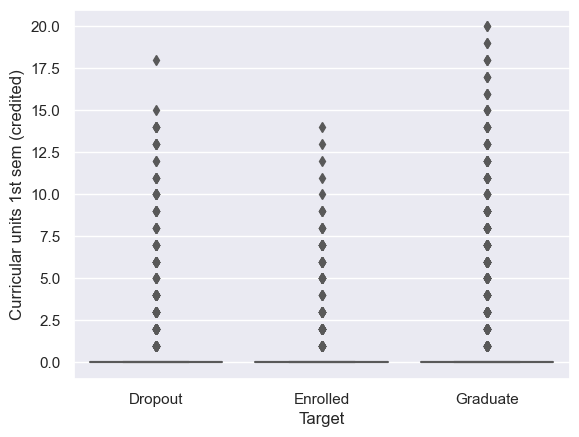

In [24]:
median = df[["Curricular units 1st sem (credited)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (credited)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (credited)", data = df, order = median.index)

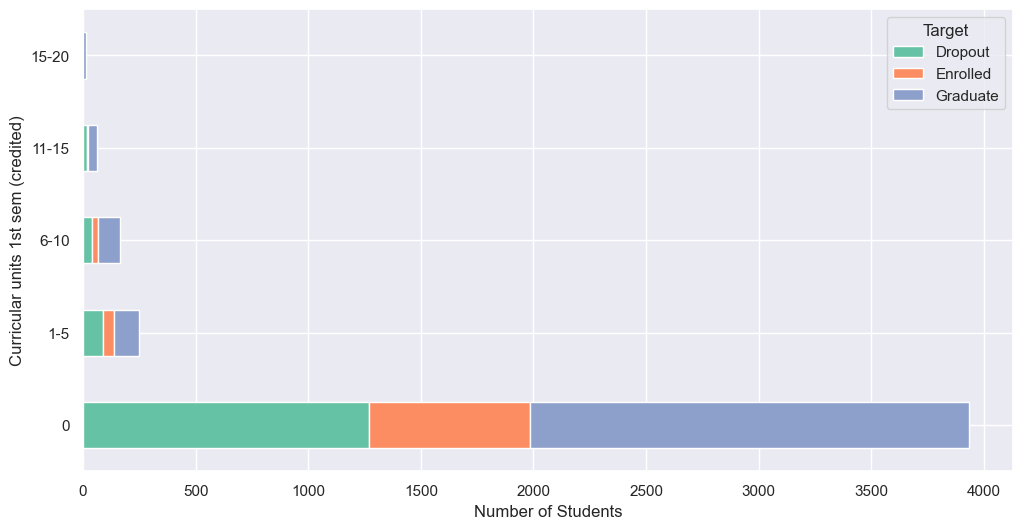

Percentage of students who drop out based on Curricular units in 1st sem (credited): 
0: 32.32%
1-5: 35.46%
6-10: 24.85%
11-15: 30.65%
15-20: 7.14%


In [25]:
bins = [0, 1, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
df['credited1'] = pd.cut(df['Curricular units 1st sem (credited)'], bins=bins, labels=labels, include_lowest=True)


credited1_df = df.groupby(["credited1", "Target"]).size().reset_index().pivot(columns = 'Target', index = "credited1", values = 0)

credited1_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.ylabel('Curricular units 1st sem (credited)')
plt.show()

print("Percentage of students who drop out based on Curricular units in 1st sem (credited): ")
for i in range(5):
    credited1i_df = credited1_df.iloc[i]
    percent = (credited1i_df["Dropout"].sum() / (credited1i_df["Dropout"].sum() + credited1i_df["Enrolled"].sum() + credited1i_df["Graduate"].sum())) * 100
    print(f"{labels[i]}: {percent:.2f}%")

#### Curricular units 1st sem (enrolled) (Numerical)
- Majority of students had **6 curricular units** enrolled in the 1st semester

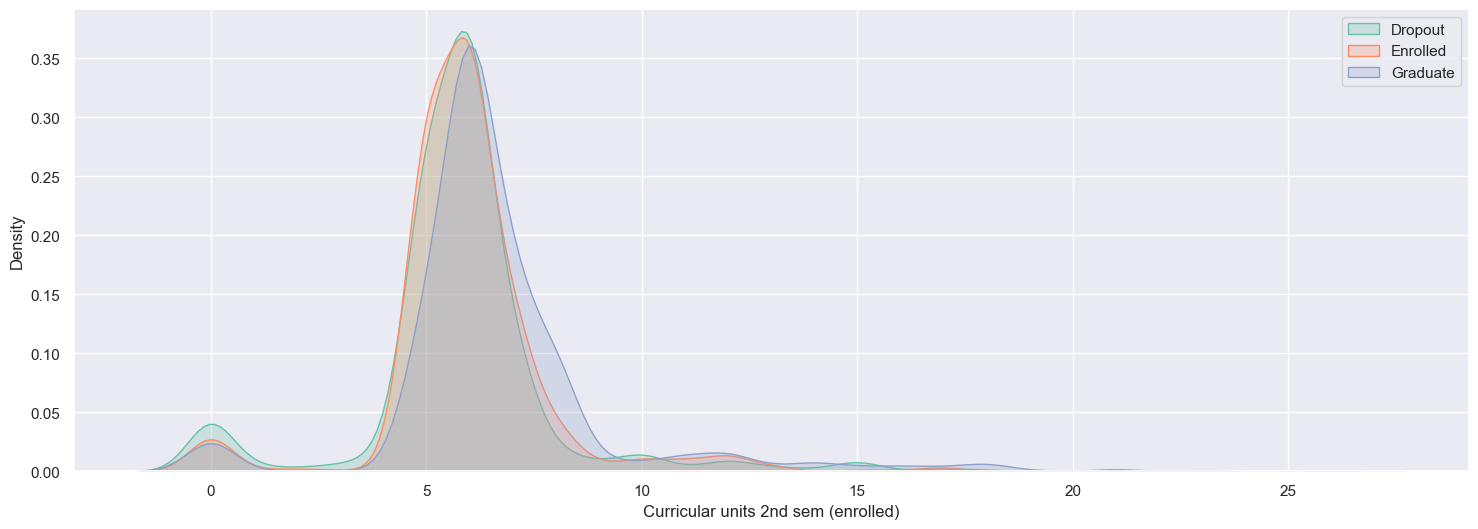

In [26]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (enrolled)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (enrolled)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (enrolled)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (enrolled)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (enrolled)'>

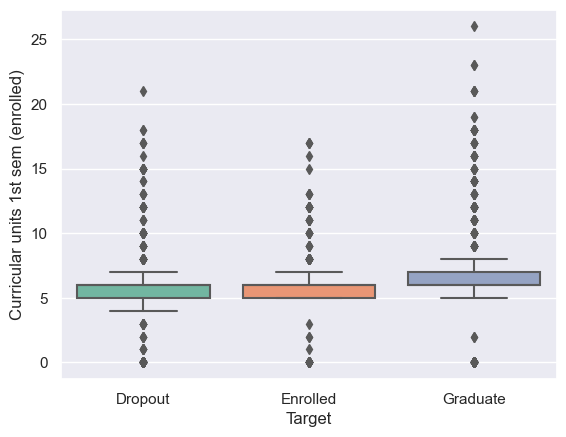

In [27]:
median = df[["Curricular units 1st sem (enrolled)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (enrolled)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (enrolled)", data = df, order = median.index)

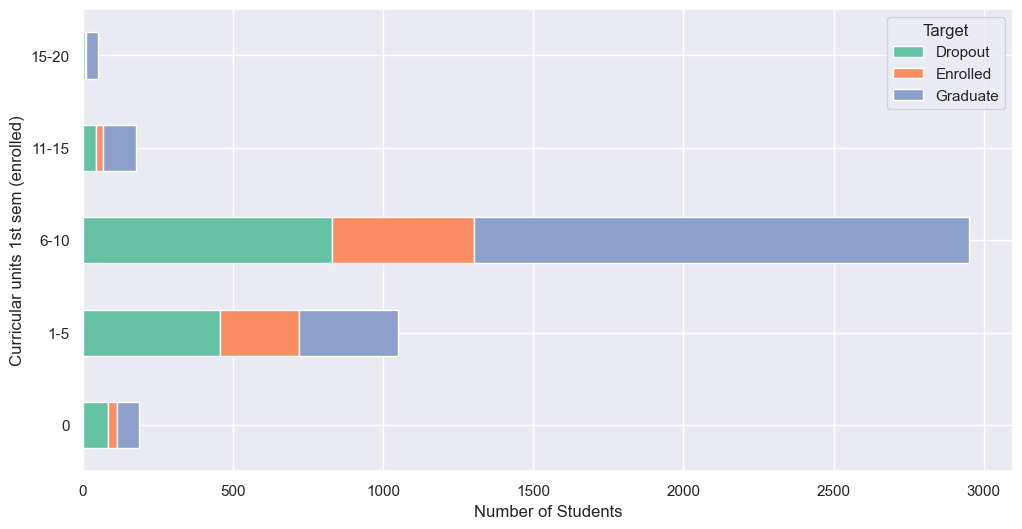

Percentage of students who drop out based on Curricular units in 1st sem (credited): 
0: 44.39%
1-5: 43.43%
6-10: 28.17%
11-15: 24.16%
15-20: 14.00%


In [28]:
bins = [0, 1, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
df['enrolled1'] = pd.cut(df['Curricular units 1st sem (enrolled)'], bins=bins, labels=labels, include_lowest=True)


enrolled1_df = df.groupby(["enrolled1", "Target"]).size().reset_index().pivot(columns = 'Target', index = "enrolled1", values = 0)

enrolled1_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.ylabel('Curricular units 1st sem (enrolled)')
plt.show()

print("Percentage of students who drop out based on Curricular units in 1st sem (credited): ")
for i in range(5):
    enrolled1i_df = enrolled1_df.iloc[i]
    percent = (enrolled1i_df["Dropout"].sum() / (enrolled1i_df["Dropout"].sum() + enrolled1i_df["Enrolled"].sum() + enrolled1i_df["Graduate"].sum())) * 100
    print(f"{labels[i]}: {percent:.2f}%")

#### Curricular units 1st sem (approved) (Numerical)
- Majority of Dropouts had **0 curricular units** approved in the 2nd semester
- Majority of Enrolled had **5 curricular units** approved in the 2nd semester
- Majority of Graduates had **6 curricular units** approved in the 2nd semester

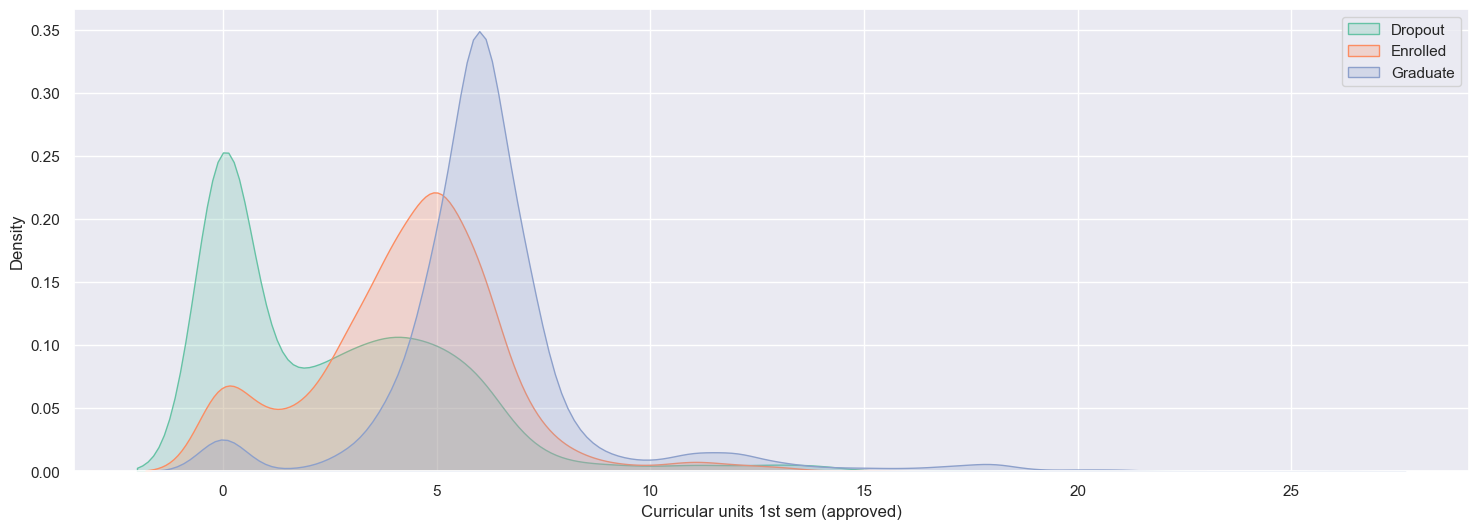

In [29]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (approved)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (approved)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (approved)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 1st sem (approved)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (approved)'>

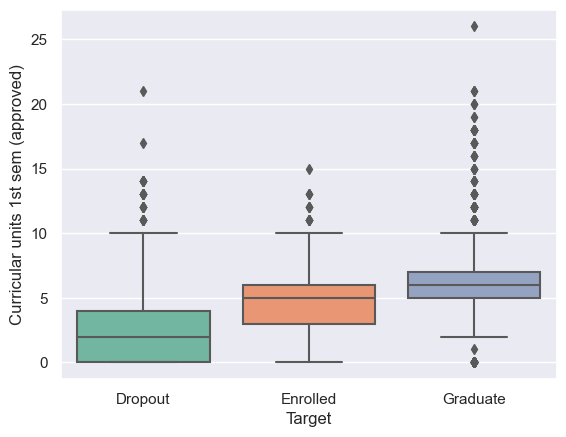

In [30]:
median = df[["Curricular units 1st sem (approved)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (approved)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (approved)", data = df, order = median.index)

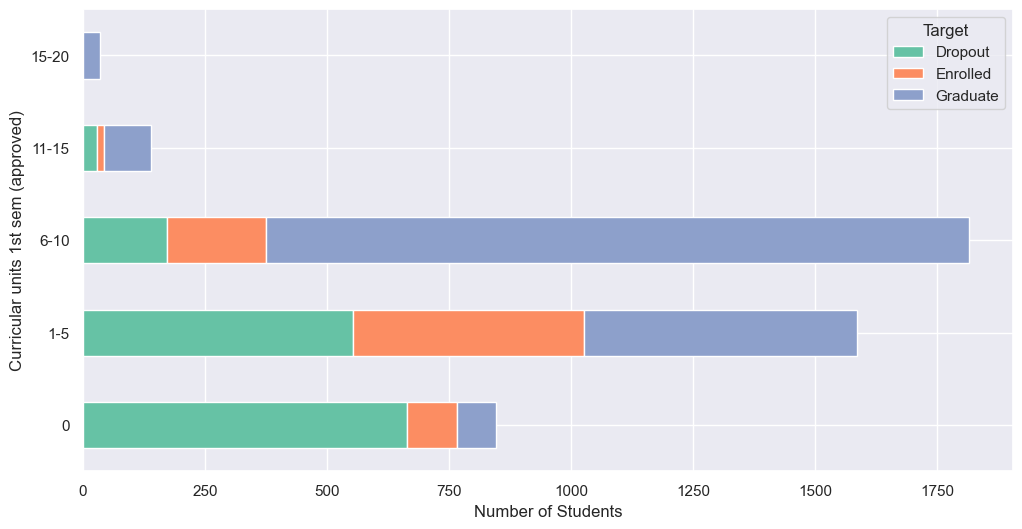

Percentage of students who drop out based on Curricular units in 1st sem (approved): 
0: 78.46%
1-5: 34.95%
6-10: 9.54%
11-15: 20.71%
15-20: 2.86%


In [31]:
bins = [0, 1, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
df['approved1'] = pd.cut(df['Curricular units 1st sem (approved)'], bins=bins, labels=labels, include_lowest=True)


approved1_df = df.groupby(["approved1", "Target"]).size().reset_index().pivot(columns = 'Target', index = "approved1", values = 0)

approved1_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.ylabel('Curricular units 1st sem (approved)')
plt.show()

print("Percentage of students who drop out based on Curricular units in 1st sem (approved): ")
for i in range(5):
    approved1i_df = approved1_df.iloc[i]
    percent = (approved1i_df["Dropout"].sum() / (approved1i_df["Dropout"].sum() + approved1i_df["Enrolled"].sum() + approved1i_df["Graduate"].sum())) * 100
    print(f"{labels[i]}: {percent:.2f}%")

#### Curricular units 1st sem (evaluations) (Numerical)
- Majority of Dropouts had **8 curricular units** evaluated in the 2nd semester
- Majority of Enrolled had **9 curricular units** evaluated in the 2nd semester
- Majority of Graduates had **8 curricular units** evaluated in the 2nd semester 

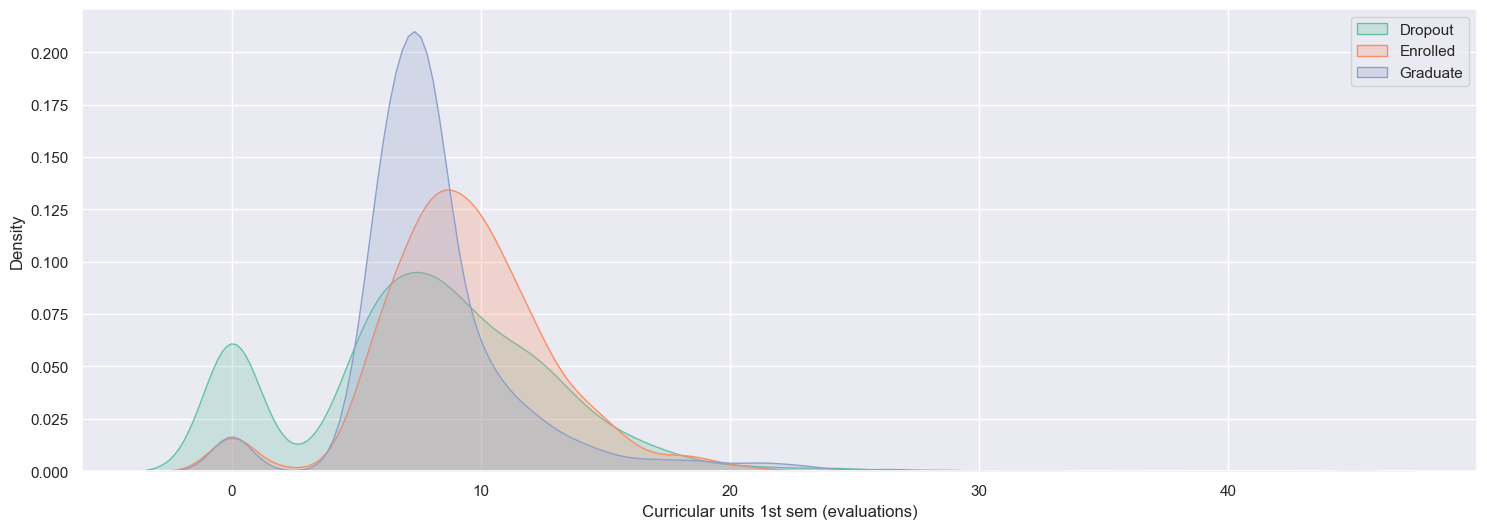

In [32]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (evaluations)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (evaluations)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (evaluations)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 1st sem (evaluations)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (evaluations)'>

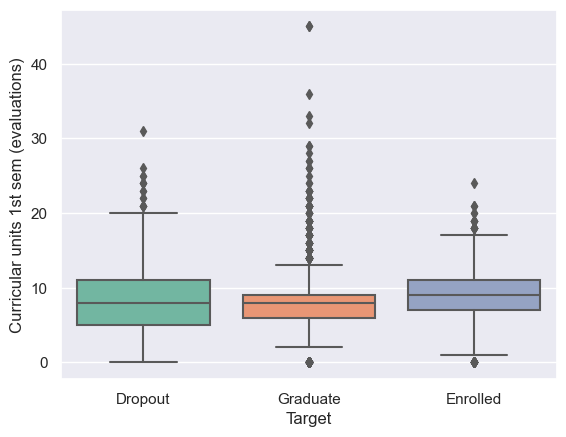

In [33]:
median = df[["Curricular units 1st sem (evaluations)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (evaluations)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (evaluations)", data = df, order = median.index)

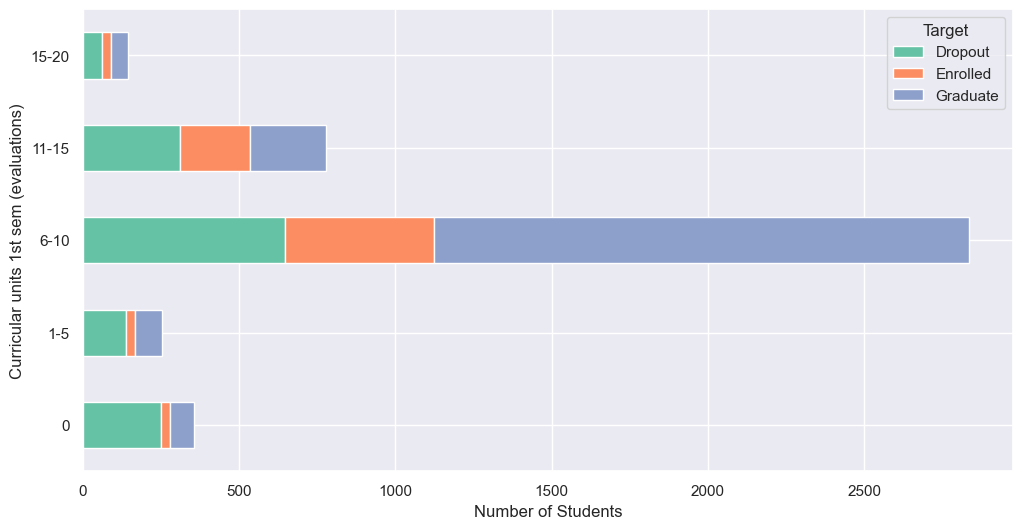

Percentage of students who drop out based on Curricular units in 1st sem (evaluations): 
0: 70.70%
1-5: 54.55%
6-10: 22.79%
11-15: 40.03%
15-20: 41.38%


In [34]:
bins = [0, 1, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
df['evaluations1'] = pd.cut(df['Curricular units 1st sem (evaluations)'], bins=bins, labels=labels, include_lowest=True)


evaluations1_df = df.groupby(["evaluations1", "Target"]).size().reset_index().pivot(columns = 'Target', index = "evaluations1", values = 0)

evaluations1_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.ylabel('Curricular units 1st sem (evaluations)')
plt.show()

print("Percentage of students who drop out based on Curricular units in 1st sem (evaluations): ")
for i in range(5):
    evaluations1i_df = evaluations1_df.iloc[i]
    percent = (evaluations1i_df["Dropout"].sum() / (evaluations1i_df["Dropout"].sum() + evaluations1i_df["Enrolled"].sum() + evaluations1i_df["Graduate"].sum())) * 100
    print(f"{labels[i]}: {percent:.2f}%")

#### Curricular units 1st sem (grade) (Numerical)
- Majority of Dropouts had **0 or 12 curricular units** graded in the 1st semester
- Majority of Enrolled had **12 curricular units** graded in the 1st semester
- Majority of Graduates had **13 curricular units** graded in the 1st semester

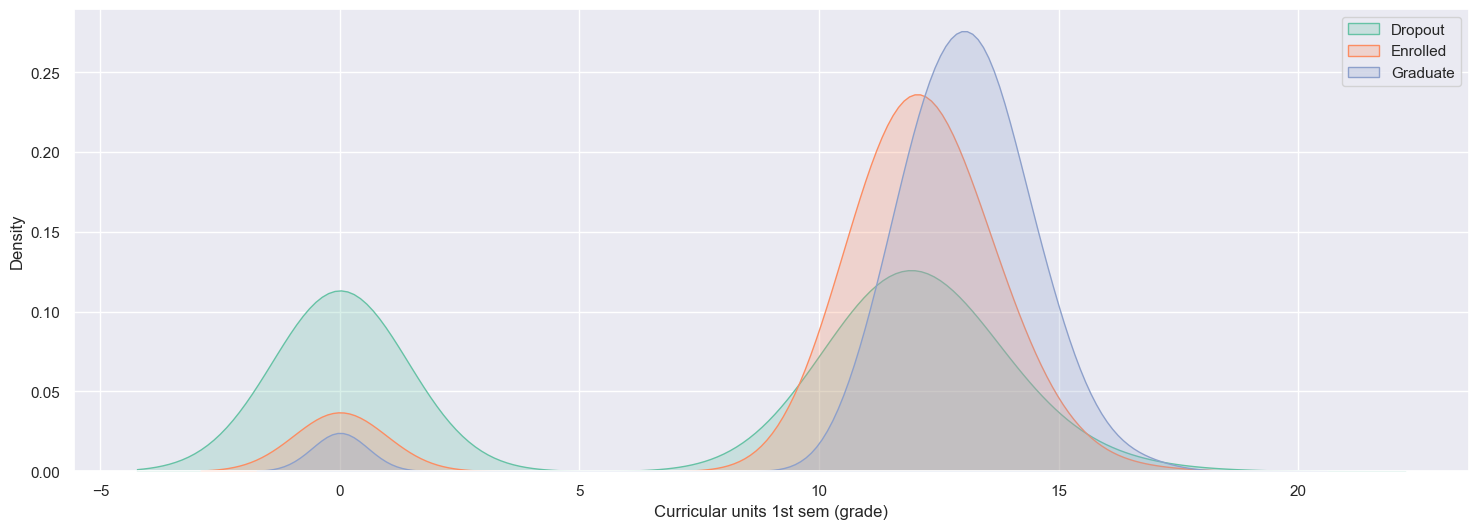

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64


In [35]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (grade)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (grade)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (grade)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 1st sem (grade)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 1st sem (grade)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (grade)'>

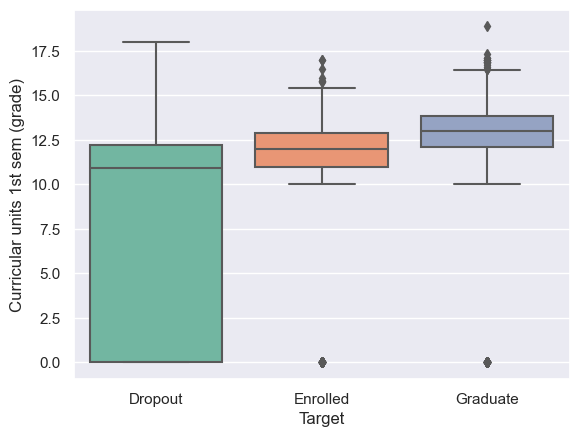

In [36]:
median = df[["Curricular units 1st sem (grade)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (grade)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (grade)", data = df, order = median.index)

#### Curricular units 1st sem (without evaluations) (Numerical)
- Majority of students had **0 curricular units** without evaluations in the 1st semester

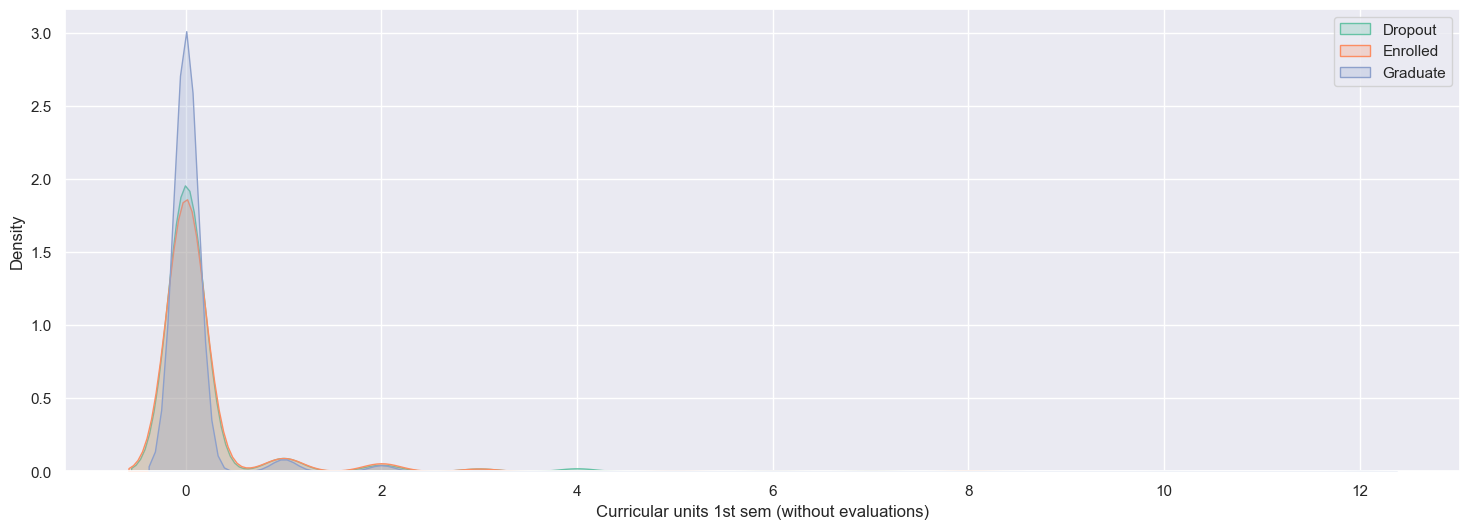

count    4424.000000
mean        0.137658
std         0.690880
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular units 1st sem (without evaluations), dtype: float64


In [37]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 1st sem (without evaluations)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 1st sem (without evaluations)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 1st sem (without evaluations)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 1st sem (without evaluations)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 1st sem (without evaluations)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 1st sem (without evaluations)'>

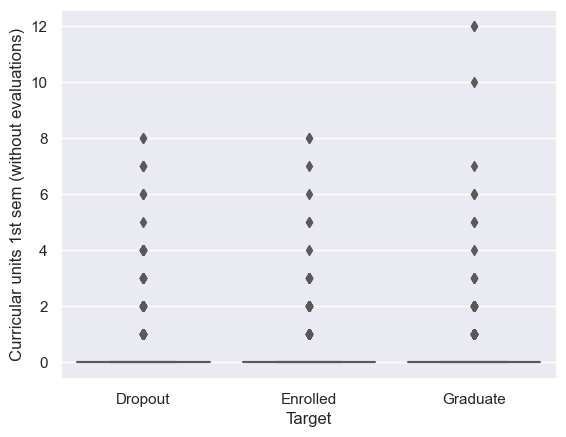

In [38]:
median = df[["Curricular units 1st sem (without evaluations)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 1st sem (without evaluations)")
sb.boxplot(x = "Target", y = "Curricular units 1st sem (without evaluations)", data = df, order = median.index)

#### Curricular units 2nd sem (credited) (Numerical)
- Majority of students had **0 curricular units** credited in the 2nd semester

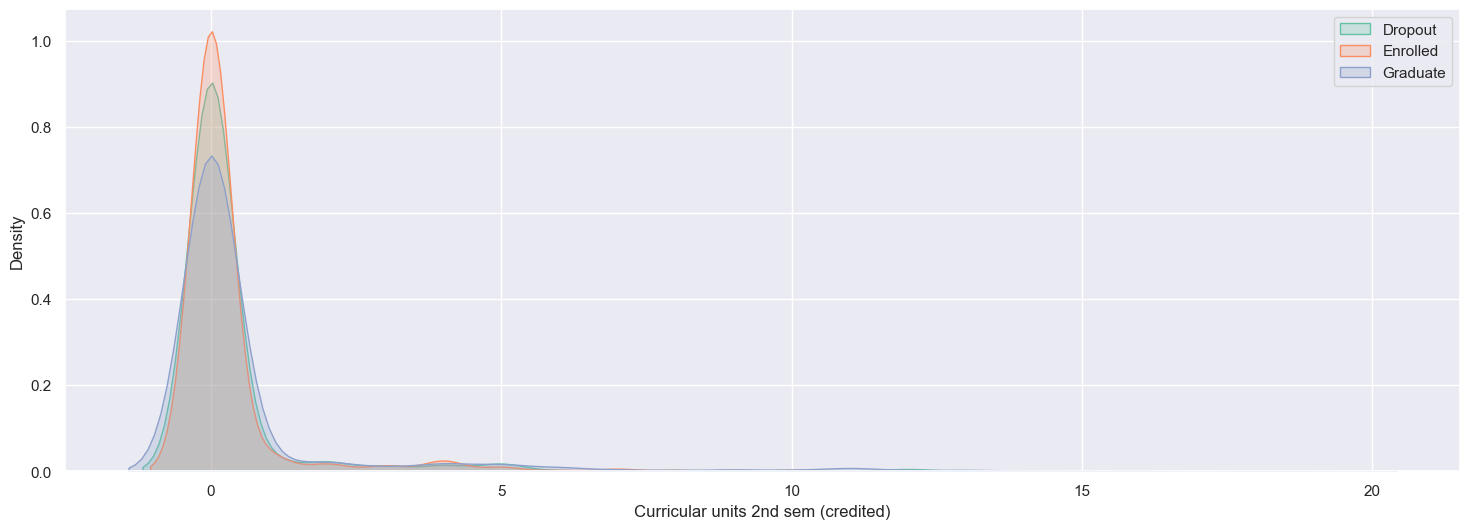

count    4424.000000
mean        0.541817
std         1.918546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.000000
Name: Curricular units 2nd sem (credited), dtype: float64


In [39]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (credited)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (credited)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (credited)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (credited)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (credited)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (credited)'>

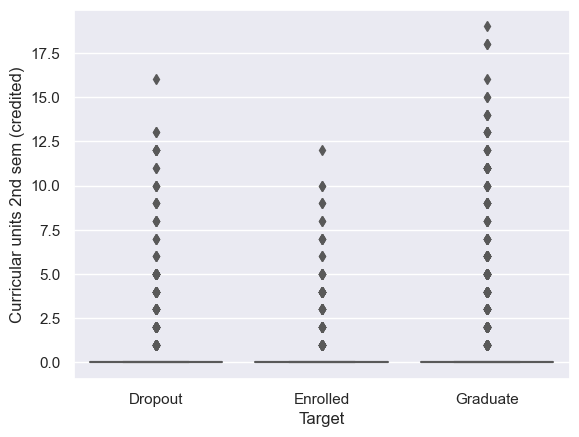

In [40]:
median = df[["Curricular units 2nd sem (credited)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (credited)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (credited)", data = df, order = median.index)

#### Curricular units 2nd sem (enrolled) (Numerical)
- Majority of students had **6 curricular units** enrolled in the 2nd semester

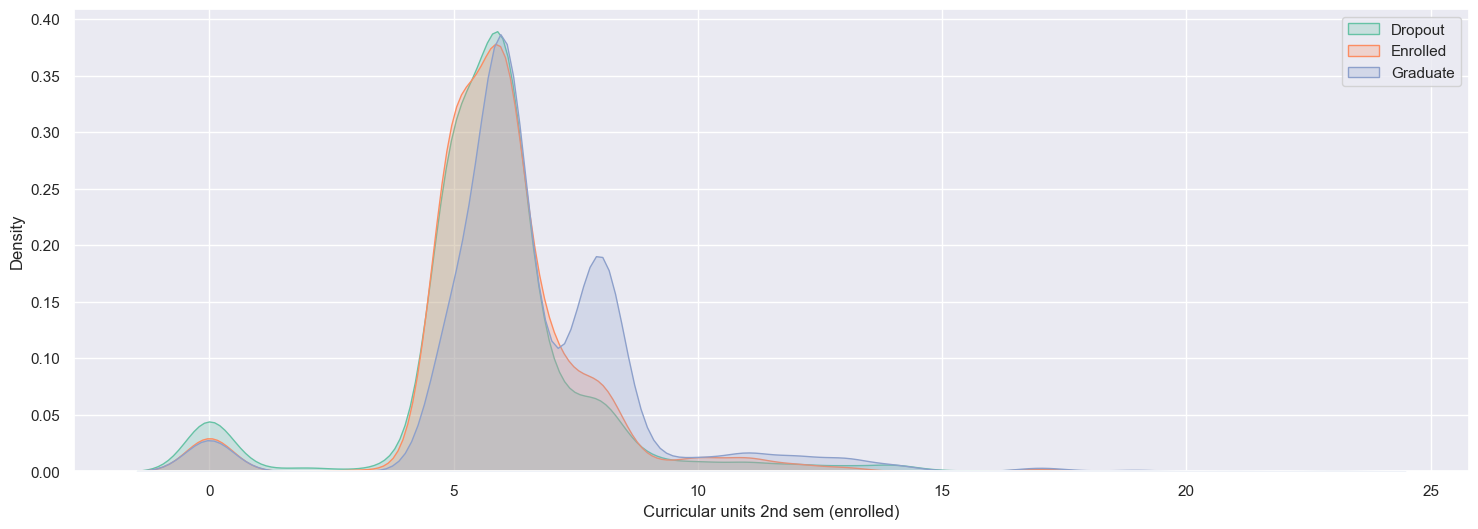

count    4424.000000
mean        6.232143
std         2.195951
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        23.000000
Name: Curricular units 2nd sem (enrolled), dtype: float64


In [41]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (enrolled)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (enrolled)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (enrolled)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (enrolled)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (enrolled)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (enrolled)'>

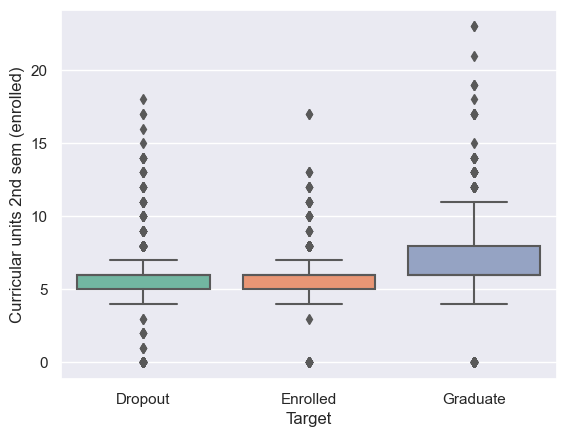

In [42]:
median = df[["Curricular units 2nd sem (enrolled)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (enrolled)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (enrolled)", data = df, order = median.index)

#### Curricular units 2nd sem (evaluations) (Numerical)
- Majority of Dropouts had **7 curricular units** evaluated in the 2nd semester
- Majority of Enrolled had **9 curricular units** evaluated in the 2nd semester
- Majority of Graduates had **8 curricular units** evaluated in the 2nd semester

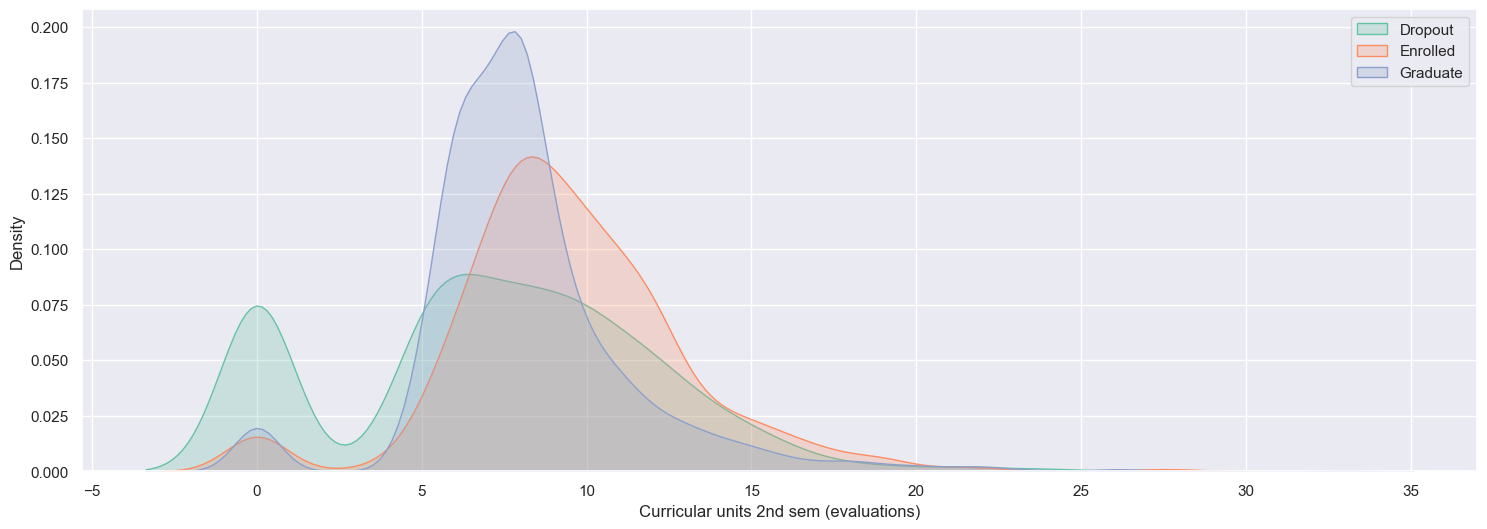

count    4424.000000
mean        8.063291
std         3.947951
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        33.000000
Name: Curricular units 2nd sem (evaluations), dtype: float64


In [43]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (evaluations)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (evaluations)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (evaluations)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (evaluations)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (evaluations)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (evaluations)'>

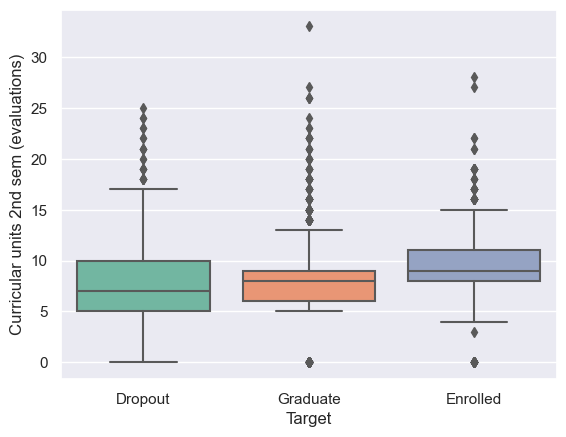

In [44]:
median = df[["Curricular units 2nd sem (evaluations)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (evaluations)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (evaluations)", data = df, order = median.index)

#### Curricular units 2nd sem (approved) (Numerical)
- Majority of Dropouts had **0 curricular units** approved in the 2nd semester
- Majority of Enrolled had **4 curricular units** approved in the 2nd semester
- Majority of Graduates had **6 curricular units** approved in the 2nd semester

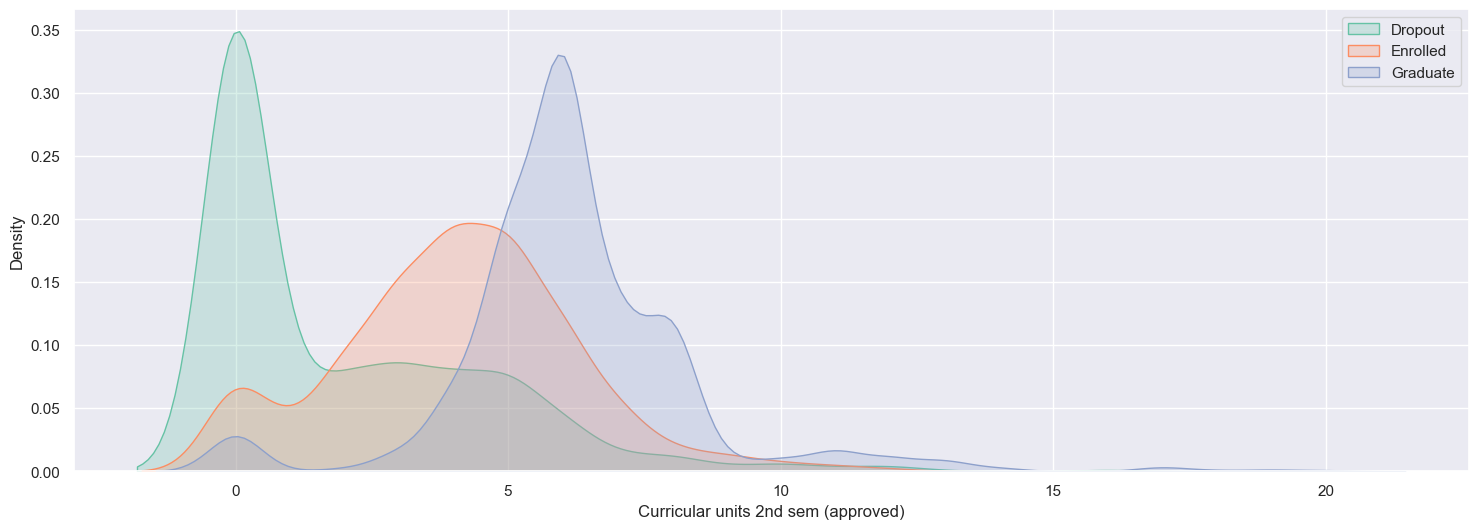

count    4424.000000
mean        4.435805
std         3.014764
min         0.000000
25%         2.000000
50%         5.000000
75%         6.000000
max        20.000000
Name: Curricular units 2nd sem (approved), dtype: float64


In [45]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (approved)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (approved)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (approved)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (approved)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (approved)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (approved)'>

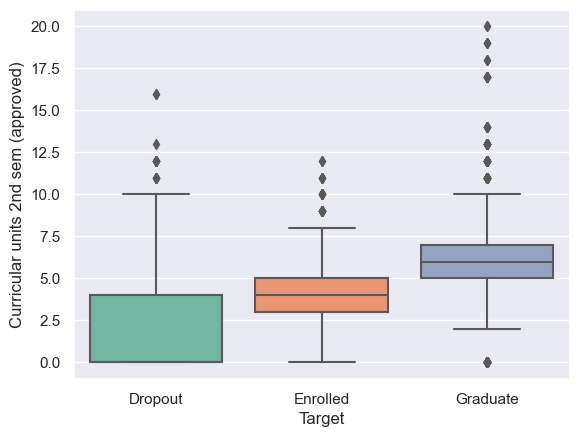

In [46]:
median = df[["Curricular units 2nd sem (approved)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (approved)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (approved)", data = df, order = median.index)

#### Curricular units 2nd sem (grade) (Numerical)
- Majority of Dropouts had **0 curricular units** graded in the 2nd semester
- Majority of Enrolled had **12 curricular units** graded in the 2nd semester
- Majority of Graduates had **13 curricular units** graded in the 2nd semester

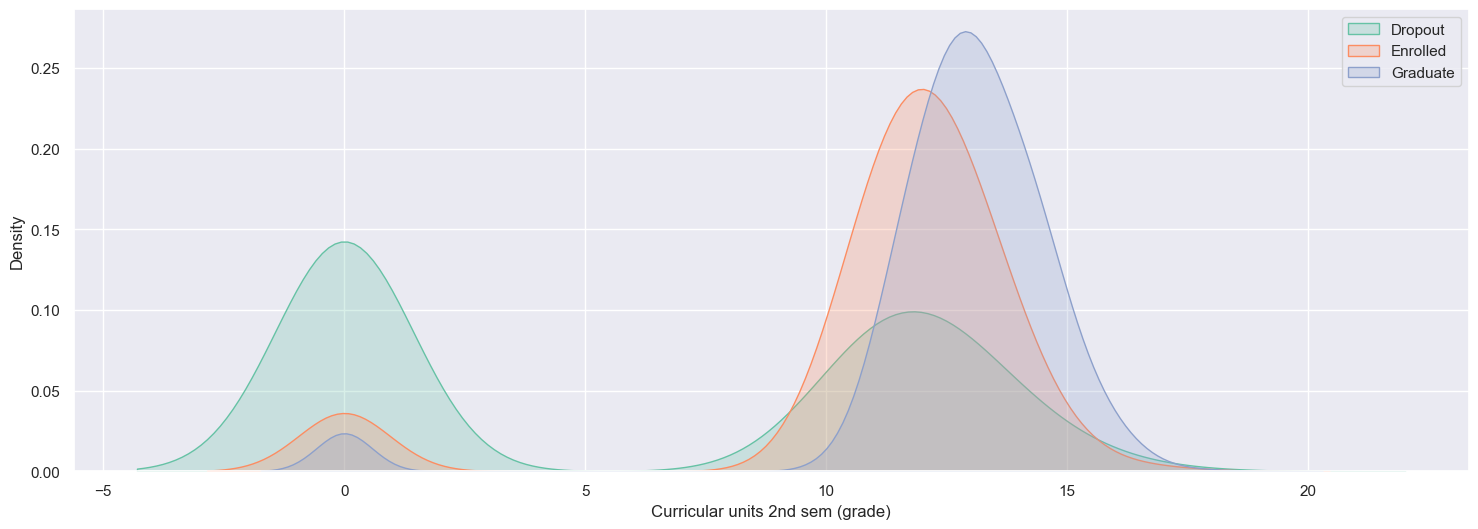

count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: Curricular units 2nd sem (grade), dtype: float64


In [47]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (grade)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (grade)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (grade)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (grade)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (grade)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (grade)'>

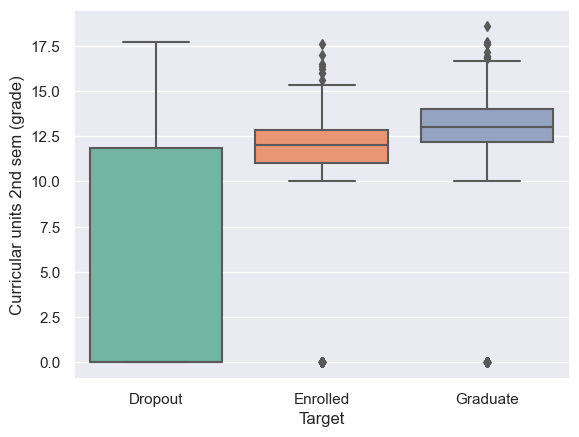

In [48]:
median = df[["Curricular units 2nd sem (grade)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (grade)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (grade)", data = df, order = median.index)

#### Curricular units 2nd sem (without evaluations) (Numerical)
- Majority of students had **0 curricular units** without evaluations in the 2nd semester

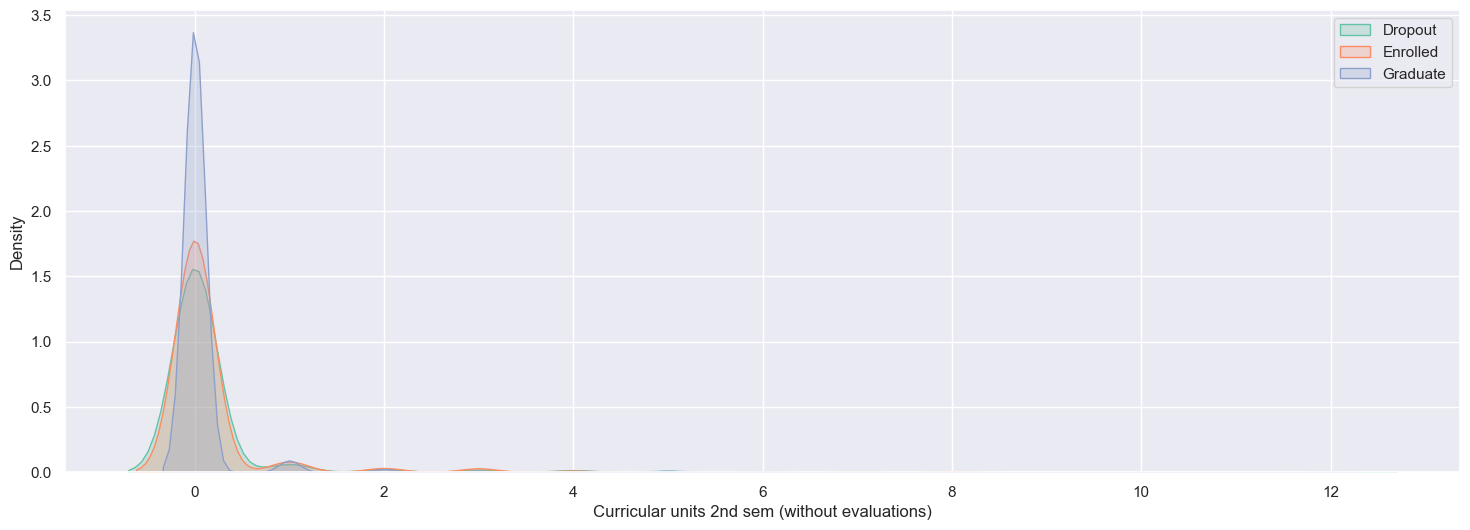

count    4424.000000
mean        0.150316
std         0.753774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: Curricular units 2nd sem (without evaluations), dtype: float64


In [49]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Curricular units 2nd sem (without evaluations)"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Curricular units 2nd sem (without evaluations)"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Curricular units 2nd sem (without evaluations)"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Curricular units 2nd sem (without evaluations)")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Curricular units 2nd sem (without evaluations)"].describe())

<AxesSubplot:xlabel='Target', ylabel='Curricular units 2nd sem (without evaluations)'>

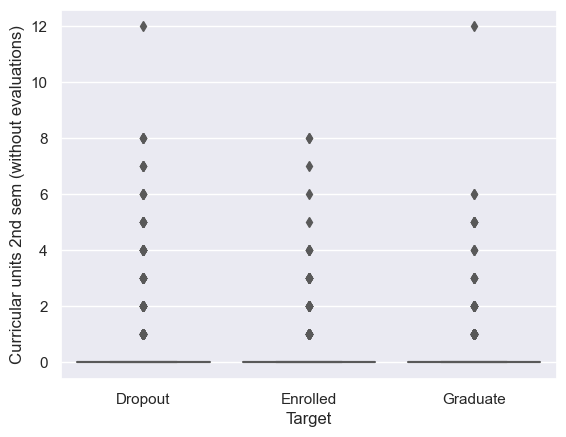

In [50]:
median = df[["Curricular units 2nd sem (without evaluations)", "Target"]].groupby("Target").median().sort_values(by = "Curricular units 2nd sem (without evaluations)")
sb.boxplot(x = "Target", y = "Curricular units 2nd sem (without evaluations)", data = df, order = median.index)

#### Unemployment rate (Numerical)
- Majority of students experienced unemployment rate of **11.1**

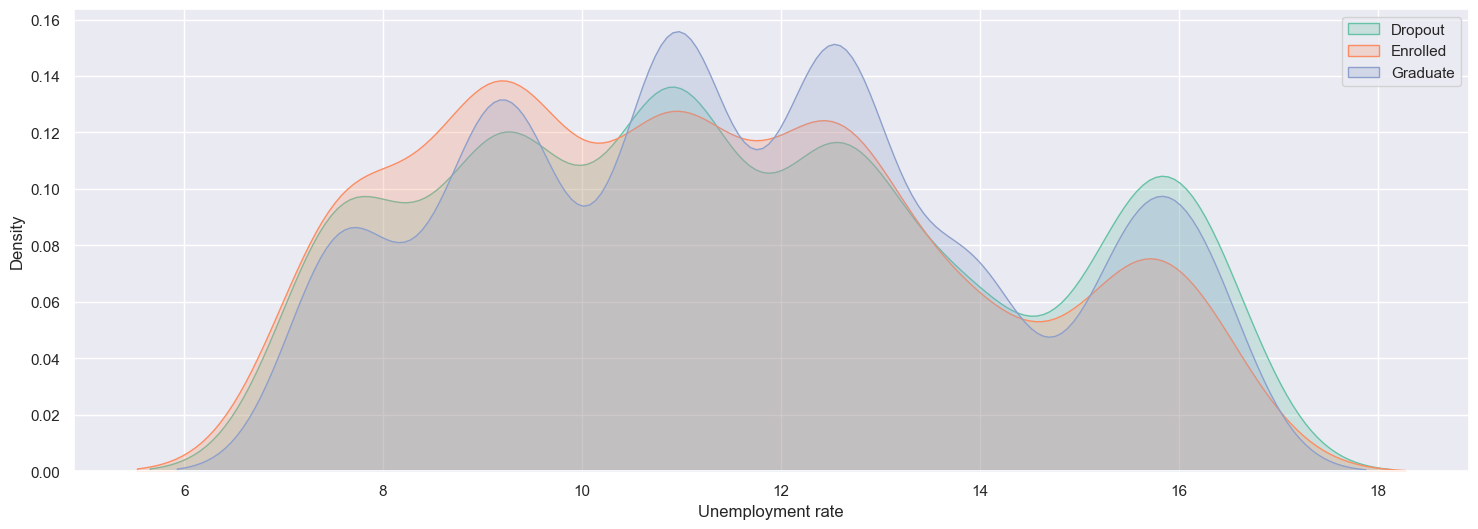

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64


In [51]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Unemployment rate"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Unemployment rate"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Unemployment rate"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Unemployment rate")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Unemployment rate"].describe())

<AxesSubplot:xlabel='Target', ylabel='Unemployment rate'>

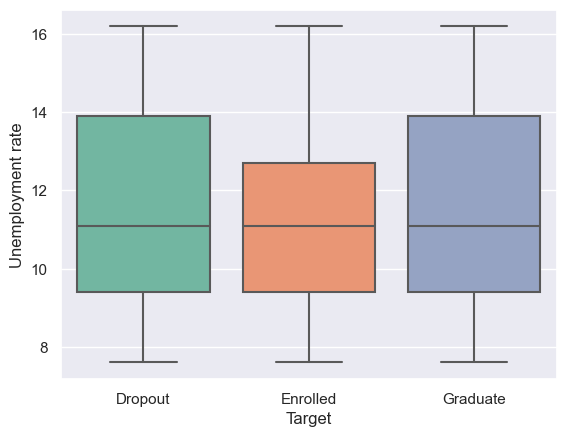

In [52]:
median = df[["Unemployment rate", "Target"]].groupby("Target").median().sort_values(by = "Unemployment rate")
sb.boxplot(x = "Target", y = "Unemployment rate", data = df, order = median.index)

#### Inflation rate (Numerical)
- Majority of Dropouts & Enrolled experienced inflation rate of **1.4**
- Majority of Graduates experienced inflation rate of **0.6**

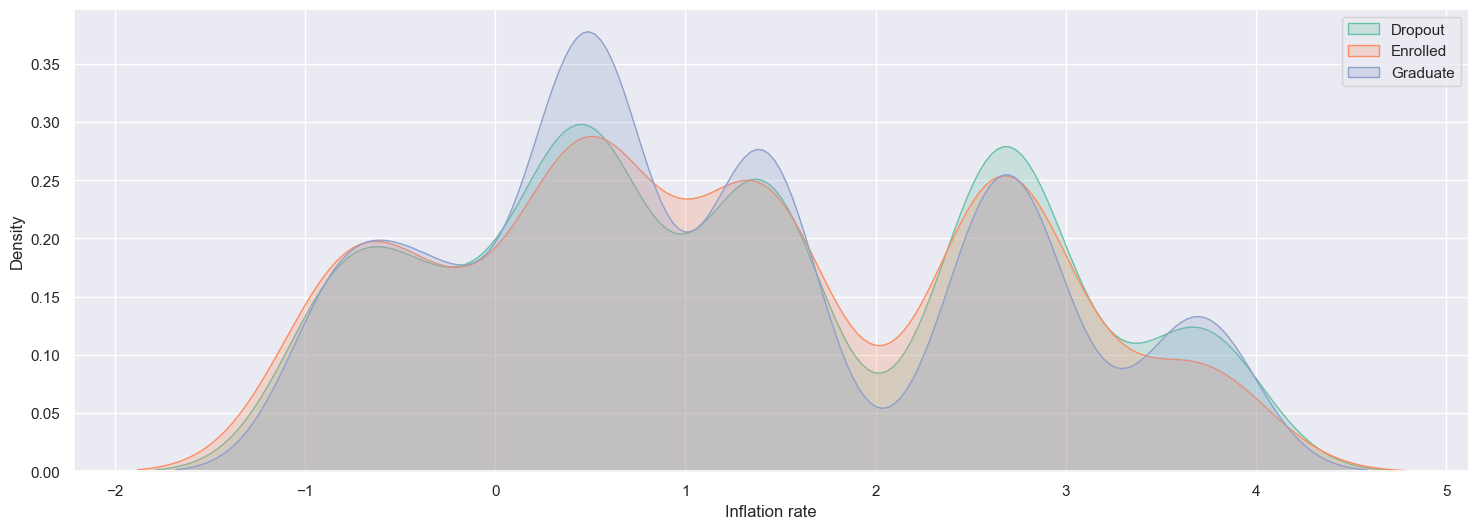

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64


In [53]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Inflation rate"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Inflation rate"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Inflation rate"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("Inflation rate")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["Inflation rate"].describe())

<AxesSubplot:xlabel='Target', ylabel='Inflation rate'>

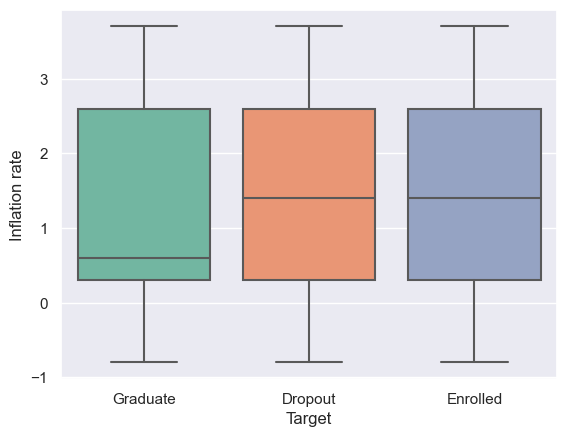

In [54]:
median = df[["Inflation rate", "Target"]].groupby("Target").median().sort_values(by = "Inflation rate")
sb.boxplot(x = "Target", y = "Inflation rate", data = df, order = median.index)

#### GDP (Numerical)
- Majority of Dropouts & Enrolled experienced inflation rate of **0.32**
- Majority of Graduates experienced inflation rate of **0.79**

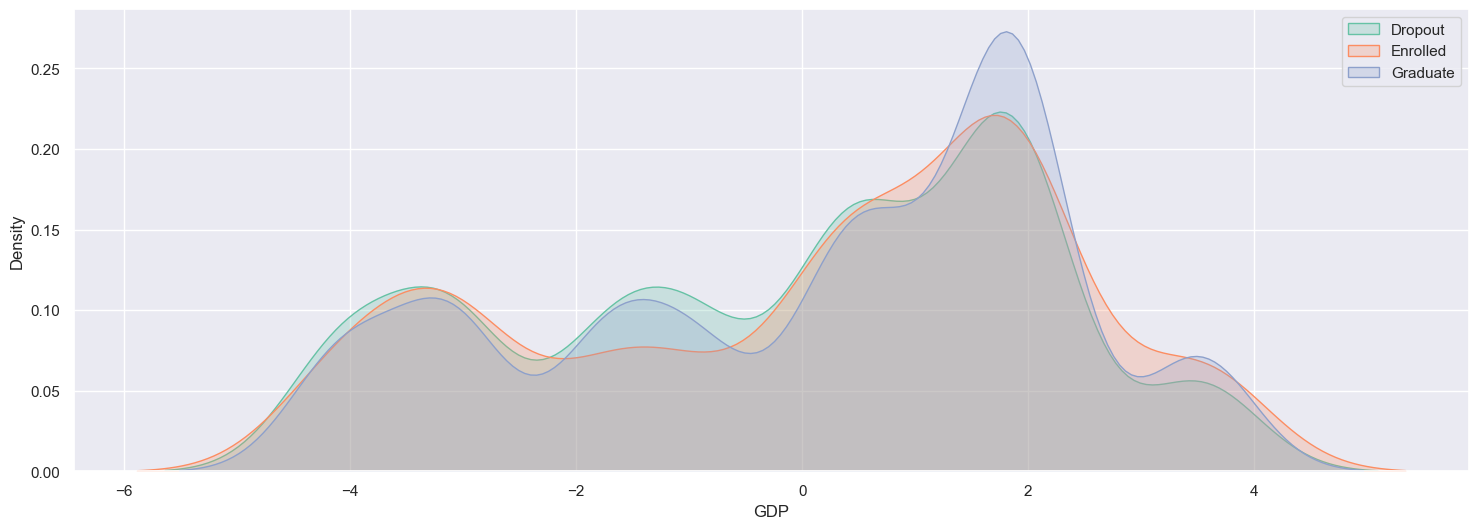

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64


In [55]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["GDP"], shade=True, label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["GDP"], shade=True, label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["GDP"], shade=True, label="Graduate", ax=ax)

ax.set_xlabel("GDP")
ax.set_ylabel("Density")
plt.legend()
plt.show()
print(df["GDP"].describe())

<AxesSubplot:xlabel='Target', ylabel='GDP'>

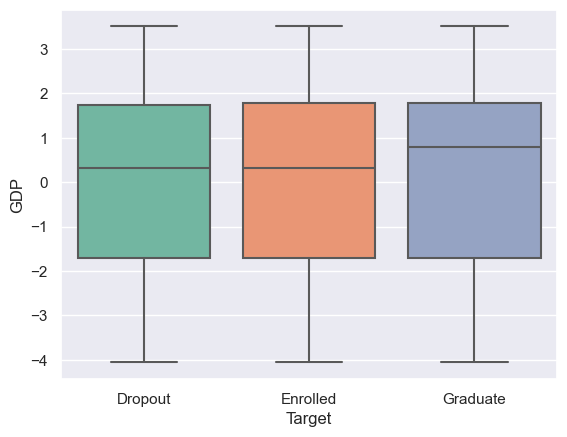

In [56]:
median = df[["GDP", "Target"]].groupby("Target").median().sort_values(by = "GDP")
sb.boxplot(x = "Target", y = "GDP", data = df, order = median.index)